# 1. Data Wrangling

In this notebook, we perform data cleaning, fix missing values, and add new columns with meaning values.

## 1.1 Loading modules

In [1]:
import pandas as pd
import numpy as np

#To find the file encoding type
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob

#plotly
#import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
#plotly.tools.set_credentials_file(username='ahrimhan', api_key='iGryT0mF9uXxVgbnCgT9')

## 1.2 Importing and loading data

### [Test data]
We acquired the test score data for the [California Assessment of Student Performance and Progress (CAASPP)](https://caaspp.cde.ca.gov/). The test type is the Smarter Balanced English Language Arts/Literacy and Mathematics.

* The public data is available between 2015 and 2018 (4 years):
[Research Files for Smarter Balanced Assessments](https://caaspp.cde.ca.gov/sb2018/ResearchFileList)

* The data set is too large to commit to GitHub, please refer the data set in the following link:
[CAASPP test scores](https://drive.google.com/drive/folders/1puqmaVznmecKan-O6VNrqZy11MLeLzHo?usp=sharing)

#### Test data

We first load the 2018 test data.

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
missing_values = ['n/a', 'na', '-', '*']

In [4]:
dtype_= {'Percentage Standard Exceeded': np.float64,
        'Percentage Standard Met': np.float64,
        'Percentage Standard Met and Above': np.float64,
        'Percentage Standard Nearly Met': np.float64,
        'Percentage Standard Not Met': np.float64,
        'Area 1 Percentage Above Standard': np.float64,
        'Area 1 Percentage Near Standard': np.float64,
        'Area 1 Percentage Below Standard': np.float64,
        'Area 2 Percentage Above Standard': np.float64,
        'Area 2 Percentage Near Standard': np.float64,
        'Area 2 Percentage Below Standard': np.float64,
        'Area 3 Percentage Above Standard': np.float64,
        'Area 3 Percentage Near Standard': np.float64,
        'Area 3 Percentage Below Standard': np.float64,
        'Area 4 Percentage Above Standard': np.float64,
        'Area 4 Percentage Near Standard': np.float64,
        'Area 4 Percentage Below Standard': np.float64}

In [5]:
df = pd.read_csv("../../CAASPP/all/sb_ca2018_all.csv", na_values = missing_values, dtype=dtype_)

In [6]:
#time series plot
path = "../../CAASPP/all/"
allFiles = glob.glob(path + "/*.csv")

list_ = []

for file_ in allFiles:
    df_temp = pd.read_csv(file_, na_values = missing_values, dtype=dtype_, index_col=None, header=0)
    list_.append(df_temp)

df_all = pd.concat(list_, axis = 0, ignore_index = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [7]:
df.shape

(3269730, 32)

In [8]:
df.head()

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total Tested At Entity Level,Total Tested with Scores,Grade,Test Id,CAASPP Reported Enrollment,Students Tested,Mean Scale Score,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,NaN,2018,1,B,3180571.0,3177420.0,3,1,445017.0,434468.0,2424.0,26.13,22.09,48.22,23.49,28.29,434207.0,25.32,44.02,30.66,23.84,43.30,32.85,20.89,61.25,17.86,27.60,47.71,24.68
1,0,0,0,NaN,2018,1,B,3187408.0,3184720.0,3,2,445018.0,436464.0,2430.9,21.07,27.82,48.89,23.56,27.55,436215.0,33.59,33.20,33.21,26.72,42.30,30.98,28.80,46.31,24.89,0.00,0.00,0.00
2,0,0,0,NaN,2018,1,B,3187408.0,3184720.0,4,2,463838.0,455619.0,2467.7,18.46,24.45,42.91,30.81,26.27,455345.0,29.03,31.02,39.95,21.65,44.73,33.62,24.03,43.78,32.20,0.00,0.00,0.00
3,0,0,0,NaN,2018,1,B,3180571.0,3177420.0,4,1,463838.0,453771.0,2463.7,26.31,22.36,48.67,19.25,32.08,453491.0,24.77,46.77,28.46,24.18,44.21,31.61,19.30,63.22,17.48,25.86,48.83,25.31
4,0,0,0,NaN,2018,1,B,3180571.0,3177420.0,5,1,469247.0,459434.0,2496.3,21.80,27.63,49.43,19.99,30.58,459209.0,24.22,45.02,30.76,29.20,41.42,29.38,16.52,59.74,23.73,28.29,44.32,27.39


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269730 entries, 0 to 3269729
Data columns (total 32 columns):
County Code                          int64
District Code                        int64
School Code                          int64
Filler                               float64
Test Year                            int64
Subgroup ID                          int64
Test Type                            object
Total Tested At Entity Level         float64
Total Tested with Scores             float64
Grade                                int64
Test Id                              int64
CAASPP Reported Enrollment           float64
Students Tested                      float64
Mean Scale Score                     float64
Percentage Standard Exceeded         float64
Percentage Standard Met              float64
Percentage Standard Met and Above    float64
Percentage Standard Nearly Met       float64
Percentage Standard Not Met          float64
Students with Scores                 float64
Ar

#### Entity tables
The following entity files list the County, District, and School entity names and codes for all entities as the existed in the administration year selected. This file must be merged with the test data file to join these entity names with the appropriate score data.

In [10]:
#find the file encoding type (warning: it takes so long time, so just put the exact number)
#with open("../../CAASPP/entities/sb_ca2018entities.csv", 'rb') as f:
#    result = chardet.detect(f.read())  # or readline if the file is large
    
result = {'encoding': 'Windows-1252', 'confidence': 0.7299741290274674, 'language': ''}

In [11]:
entities = pd.read_csv("../../CAASPP/entities/sb_ca2018entities.csv", encoding=result['encoding'], na_values = missing_values)

In [12]:
entities.shape

(11333, 10)

In [13]:
entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11333 entries, 0 to 11332
Data columns (total 10 columns):
County Code      11333 non-null int64
District Code    11333 non-null int64
School Code      11333 non-null int64
Filler           0 non-null float64
Test Year        11333 non-null int64
Type Id          11333 non-null int64
County Name      11333 non-null object
District Name    11274 non-null object
School Name      10251 non-null object
Zip Code         11333 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 885.5+ KB


In [14]:
entities.drop(columns='Filler', inplace=True)

The `Zip Code` is type string. For further merging cases, we change the `Zip Code` to the integer type to maintain the same type.

In [15]:
#tip: we need same data types of keywords for merging

#missing values

#convert 'Zip Code' column type: string to int64
entities['Zip Code'] = pd.to_numeric(entities['Zip Code'], errors='coerce').fillna(0).astype(np.int64)

In [16]:
entities.head()

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,0,0,0,2018,4,State of California,NaN,NaN,0
1,1,0,0,2018,5,Alameda,NaN,NaN,0
2,1,10017,0,2018,6,Alameda,Alameda County Office Of Education,NaN,0
3,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612
4,1,10017,123968,2018,9,Alameda,Community School For Creative Education,Community School For Creative Education,94606


#### Subgroup and Test ID tables
Each [`Subgroup ID`](https://caaspp.cde.ca.gov/sb2018/research_fixfileformat18) has the following meanings. We can investigate the characteristics of individual students. 

In [17]:
subgroup = pd.read_csv("../../CAASPP/Subgroups.txt", header=None, na_values = missing_values)
subgroup.shape

(47, 4)

In [18]:
subgroup.head()

,0,1,2,3
0,1,1,"""All Students""","""All Students"""
1,3,3,"""Male""","""Gender"""
2,4,4,"""Female""","""Gender"""
3,6,6,"""Fluent English proficient and English only""","""English-Language Fluency"""
4,7,7,"""Initial fluent English proficient (IFEP)""","""English-Language Fluency"""


We clean the `Subgroup ID` table. The first and the second columns are redundant, so the first one is dropped. We name the columns. 

The category "English-Language Fluency" has the 8 student groups:
* Fluent English proficient and English only
* Initial fluent English proficient (IFEP)
* Reclassified fluent English proficient (RFEP)
* English learners (ELs) enrolled in school in the U.S. fewer than 12 months
* English learners enrolled in school in the U.S. 12 months or more
* English learner
* Ever-ELs
* English only

Those groups are related as follows:
* Total students = Fluent English proficient and English only + English learner
* Fluent English proficient and English only = Initial fluent English proficient (IFEP) + Reclassified fluent English proficient (RFEP) + English only
* English learner = English learners (ELs) enrolled in school in the U.S. fewer than 12 months + English learners enrolled in school in the U.S. 12 months or more
* Ever-ELs = Reclassified fluent English proficient (RFEP) + English learner

The definition of **Initial fluent English proficient (IFEP)** is as follows:
On the first ever taken California English Language Development Test (CELDT), if your child scored at the Early Advanced or Advanced level of language proficiency, your child is identified as "Initially Fluent English Proficient" or IFEP, meaning that your child has enough language proficiency to continue learning like native language speaking and doesn’t need additional English Language Development support [\[1\]](https://www.cde.ca.gov/ta/tg/ep/elpacipld.asp), [\[2\]](https://stoneridge.rcsdk8.org/post/english-learner-el).

In [19]:
#delete first column (redundant with the second column); axis = 0 (index) and axis =1 (column), inplace=True means adjusting
subgroup.drop(0, axis=1, inplace=True)
subgroup.columns = ['Subgroup ID', 'Student Groups', 'Category']
subgroup.sort_values("Category")

,Subgroup ID,Student Groups,Category
0,1,"""All Students""","""All Students"""
24,128,"""Students with disability""","""Disability Status"""
20,99,"""Students with no reported disability""","""Disability Status"""
21,111,"""Not economically disadvantaged""","""Economic Status"""
7,31,"""Economically disadvantaged""","""Economic Status"""
25,142,"""English learners enrolled in school in the U...","""English-Language Fluency"""
29,180,"""English only""","""English-Language Fluency"""
22,120,"""English learners (ELs) enrolled in school in...","""English-Language Fluency"""
30,190,"""To be determined (TBD)""","""English-Language Fluency"""
28,170,"""Ever-ELs""","""English-Language Fluency"""


In [20]:
subgroup['Category'] = subgroup['Category'].map(lambda x: x.replace('"', '').strip())
subgroup['Student Groups'] = subgroup['Student Groups'].map(lambda x: x.replace('"', '').strip())
subgroup

,Subgroup ID,Student Groups,Category
0,1,All Students,All Students
1,3,Male,Gender
2,4,Female,Gender
3,6,Fluent English proficient and English only,English-Language Fluency
4,7,Initial fluent English proficient (IFEP),English-Language Fluency
5,8,Reclassified fluent English proficient (RFEP),English-Language Fluency
6,28,Migrant education,Migrant
7,31,Economically disadvantaged,Economic Status
8,74,Black or African American,Ethnicity
9,75,American Indian or Alaska Native,Ethnicity


The `Test ID` has the following meanings. The `Test ID` is 1-4; 1 represents ELA and 2 represents mathematics, respectively. We do not consider 3 and 4 because they are CAA (California Alternative Assessments) scores. The CAA scores are taken by students in grades 3–8 and grade 11 whose individualized education program (IEP) teams have determined that the student's cognitive disabilities prevent him or her from taking the online CAASPP Smarter Balanced assessments.

For readability, we convert the **column type** of `Test Id` from `int64` to `string`.

In [21]:
tests_id = pd.read_csv("../../CAASPP/Tests.txt", header=None, na_values = missing_values)
tests_id

,0,1,2
0,Test ID,Test ID Num,Test Name
1,1,1,SB - English Language Arts/Literacy
2,2,2,SB - Mathematics
3,3,3,CAA - English Language Arts/Literacy
4,4,4,CAA - Mathematics


In [22]:
#performance better (ver 1).

# tests_id.columns = ['Test Id Name', 'Test Id', 'Test Name']
# tests_id.drop(0, axis=0, inplace=True)

# tests_id['Test Id Name'] = tests_id['Test Id Name'].replace("1", "English")
# tests_id['Test Id Name'] = tests_id['Test Id Name'].replace("2", "Mathematics")
# tests_id['Test Id Name'] = tests_id['Test Id Name'].replace("3", "CAA-English")                                                        
# tests_id['Test Id Name'] = tests_id['Test Id Name'].replace("4", "CAA-Mathematics") 

# #type conversion : string to int64
# tests_id['Test Id'] = pd.to_numeric(tests_id['Test Id'], errors='coerce').fillna(0).astype(np.int64)
# tests_id.drop(columns='Test Name', inplace=True)

# tests_id

# df = pd.merge(tests_id, df, how='inner', on=['Test Id'])
# df.drop(columns='Test Id', inplace=True)
# df.rename(columns={'Test Id Name': 'Test Id'}, inplace=True)

In [23]:
#performance better (ver 2).
#convert 'Test Id' column type: int64 to string

df['Test Id'] = df['Test Id'].replace(1, "English")
df['Test Id'] = df['Test Id'].replace(2, "Mathematics")
df['Test Id'] = df['Test Id'].replace(3, "CAA-English")
df['Test Id'] = df['Test Id'].replace(4, "CAA-Mathematics")

I decided to use only the next columns: ‘Country Code’, ‘District Code’, ‘School Code’, ‘Test Year’, ‘Subgroup ID’, ‘Grade’, ‘Test Id’, ‘Students with Scores’, and achievement levels. The [minimum and maximum test scale score ranges](https://caaspp.cde.ca.gov/sb2016/ScaleScoreRanges) are provided, and the ‘Mean Scale Score’ is used to determine four achievement levels: ‘Percentage Standard Exceeded’ ‘Percentage Standard Met’, ‘Percentage Standard Nearly Met’, ‘Percentage Standard Not Met’. Many studies showed that discretization can lead to improved predictive accuracy and is more understandable. The test score data also has [area descriptors](https://caaspp.cde.ca.gov/sb2018/UnderstandingCAASPPReports). There are 4 areas of reading, writing, listening, and research/inquiry for ELA whereas 3 areas of concepts and procedures, problem solving/modeling and data analysis, and communicating reasoning for mathematics. For each area, the achievement levels are divided into ‘Above Standard’, ‘Near Standard’, and ‘Below Standard’ depending on the scale scores compared to the ‘Standard Met’ achievement level.

In [24]:
#Percentage Standard Met and Above = Percentage Standard Exceeded + Percentage Standard Met
df.drop(columns=['Filler', 'Total Tested At Entity Level', 'Total Tested with Scores', 'CAASPP Reported Enrollment', 'Students Tested', 'Mean Scale Score', 'Percentage Standard Met and Above'], inplace=True)

### [ House Prices]
* [Zillow research data](https://www.zillow.com/research/CAASPP/): House prices based on zipcodes

The Zillow Home Value Index (ZHVI) data was imported and loaded. The ZHVI is a seasonally adjusted measure of the median estimated home value across a given region and housing type. The data was collected from April 1996 to November 2018 on monthly basis. 

The column name `RegionName` denotes zipcode so it is renamed as `Zip Code`. The `Zip Code` is set as the index.

In [25]:
result= {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

**Loading ver 1.**
Data manipulation using DatetimeIndex objects.

In [26]:
#tip: column names has to be changed before setting an index; if setting index while reading csv file, error!
df_house_price2 = pd.read_csv("../../CAASPP/house/Zip_Zhvi_AllHomes.csv", encoding=result['encoding'], na_values = missing_values)

df_house_price2.rename(columns={'RegionName': 'Zip Code'}, inplace=True)
df_house_price2.set_index('Zip Code', inplace=True)
df_house_price2.head()

,RegionID,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
Zip Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,61639,New York,NY,New York-Newark-Jersey City,New York County,1,171600.0,171600.0,171400.0,171200.0,171000.0,171100.0,171300.0,171900.0,173000.0,174500.0,176100.0,177500.0,179000.0,180300.0,181500.0,182500.0,183500.0,184700.0,186100.0,187700.0,189900.0,192600.0,195400.0,198300.0,201500.0,204700.0,208100.0,211600.0,215200.0,218900.0,222800.0,226800.0,231200.0,235900.0,240700.0,245400.0,250500.0,255800.0,261200.0,267100.0,273400.0,280400.0,287900.0,296100.0,304900.0,314300.0,323500.0,332200.0,340600.0,348300.0,355200.0,361400.0,367200.0,372900.0,378500.0,384200.0,390100.0,395900.0,401600.0,406900.0,411600.0,415200.0,417700.0,419300.0,420300.0,420900.0,421200.0,421200.0,420500.0,419700.0,418900.0,417900.0,416400.0,414700.0,413000.0,411700.0,411000.0,411400.0,412800.0,415400.0,419000.0,422800.0,426900.0,432400.0,440700.0,453100.0,470400.0,491100.0,511600.0,528400.0,540300.0,547700.0,551700.0,554200.0,556400.0,558700.0,561300.0,564100.0,567500.0,572500.0,579600.0,589000.0,599600.0,610200.0,621600.0,634500.0,648800.0,663800.0,678200.0,690900.0,701600.0,710300.0,717600.0,724100.0,730700.0,737400.0,744200.0,751400.0,758400.0,764700.0,769900.0,773500.0,774900.0,772600.0,767200.0,761800.0,760300.0,763600.0,770400.0,777900.0,784900.0,790900.0,795600.0,799300.0,803200.0,809600.0,819500.0,831600.0,843400.0,852100.0,856200.0,857200.0,856500.0,853300.0,846200.0,836300.0,826100.0,820400.0,820800.0,822800.0,822100.0,818500.0,812500.0,807200.0,804600.0,803100.0,801000.0,799900.

In [27]:
df_house_price2.shape

(15531, 278)

In [28]:
df_house_price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15531 entries, 10025 to 89155
Columns: 278 entries, RegionID to 2018-11
dtypes: float64(225), int64(49), object(4)
memory usage: 33.1+ MB


In [29]:
df_house_price2.drop(columns=['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], inplace=True)
df_house_price2.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
Zip Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10025,171600.0,171600.0,171400.0,171200.0,171000.0,171100.0,171300.0,171900.0,173000.0,174500.0,176100.0,177500.0,179000.0,180300.0,181500.0,182500.0,183500.0,184700.0,186100.0,187700.0,189900.0,192600.0,195400.0,198300.0,201500.0,204700.0,208100.0,211600.0,215200.0,218900.0,222800.0,226800.0,231200.0,235900.0,240700.0,245400.0,250500.0,255800.0,261200.0,267100.0,273400.0,280400.0,287900.0,296100.0,304900.0,314300.0,323500.0,332200.0,340600.0,348300.0,355200.0,361400.0,367200.0,372900.0,378500.0,384200.0,390100.0,395900.0,401600.0,406900.0,411600.0,415200.0,417700.0,419300.0,420300.0,420900.0,421200.0,421200.0,420500.0,419700.0,418900.0,417900.0,416400.0,414700.0,413000.0,411700.0,411000.0,411400.0,412800.0,415400.0,419000.0,422800.0,426900.0,432400.0,440700.0,453100.0,470400.0,491100.0,511600.0,528400.0,540300.0,547700.0,551700.0,554200.0,556400.0,558700.0,561300.0,564100.0,567500.0,572500.0,579600.0,589000.0,599600.0,610200.0,621600.0,634500.0,648800.0,663800.0,678200.0,690900.0,701600.0,710300.0,717600.0,724100.0,730700.0,737400.0,744200.0,751400.0,758400.0,764700.0,769900.0,773500.0,774900.0,772600.0,767200.0,761800.0,760300.0,763600.0,770400.0,777900.0,784900.0,790900.0,795600.0,799300.0,803200.0,809600.0,819500.0,831600.0,843400.0,852100.0,856200.0,857200.0,856500.0,853300.0,846200.0,836300.0,826100.0,820400.0,820800.0,822800.0,822100.0,818500.0,812500.0,807200.0,804600.0,803100.0,801000.0,799900.0,795300.0,783100.0,767000.0,753400.0,744300.0,739100.0,740300.0,742000.0,739600.0,737800.0,745900.0,760600.0,776900

We make columns as **DatetimeIndex objects**. I found this is more convenient and safe for dealing with time related data.

In [30]:
#tip: when dealing with time data, it is much better to use time related libraries!
#pandas.DatetimeIndex
df_house_price2.columns = pd.to_datetime(df_house_price2.columns)
df_house_price2.head()

,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,1996-08-01 00:00:00,1996-09-01 00:00:00,1996-10-01 00:00:00,1996-11-01 00:00:00,1996-12-01 00:00:00,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00,1998-07-01 00:00:00,1998-08-01 00:00:00,1998-09-01 00:00:00,1998-10-01 00:00:00,1998-11-01 00:00:00,1998-12-01 00:00:00,1999-01-01 00:00:00,1999-02-01 00:00:00,1999-03-01 00:00:00,1999-04-01 00:00:00,1999-05-01 00:00:00,1999-06-01 00:00:00,1999-07-01 00:00:00,1999-08-01 00:00:00,1999-09-01 00:00:00,1999-10-01 00:00:00,1999-11-01 00:00:00,1999-12-01 00:00:00,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,2000-10-01 00:00:00,2000-11-01 00:00:00,2000-12-01 00:00:00,2001-01-01 00:00:00,2001-02-01 00:00:00,2001-03-01 00:00:00,2001-04-01 00:00:00,2001-05-01 00:00:00,2001-06-01 00:00:00,2001-07-01 00:00:00,2001-08-01 00:00:00,2001-09-01 00:00:00,2001-10-01 00:00:00,2001-11-01 00:00:00,2001-12-01 00:00:00,2002-01-01 00:00:00,2002-02-01 00:00:00,2002-03-01 00:00:00,2002-04-01 00:00:00,2002-05-01 00:00:00,2002-06-01 00:00:00,2002-07-01 00:00:00,2002-08-01 00:00:00,2002-09-01 00:00:00,2002-10-01 00:00:00,2002-11-01 00:00:00,2002-12-01 00:00:00,2003-01-01 00:00:00,2003-02-01 00:00:00,2003-03-01 00:00:00,2003-04-01 00:00:00,2003-05-01 00:00:00,2003-06-01 00:00:00,2003-07-01 00:00:00,2003-08-01 00:00:00,2003-09-01 00:00:00,2003-10-01 00:00:00,2003-11-01 00:00:00,2003-12-01 00:00:00,2004-01-01 00:00:00,2004-02-01 00:00:00,2004-03-01 00:00:00,2004-04-01 00:00:00,2004-05-01 00:00:00,2004-06-01 00:00:00,2004-07-01 00:00:00,2004-08-01 00:00:00,2004-09-01 00:00:00,2004-10-01 00:00:00,2004-11-01 00:00:00,2004-12-01 00:00:00,2005-01-01 00:00:00,2005-02-01 00:00:00,2005-03-01 00:00:00,2005-04-01 00:00:00,2005-05-01 00:00:00,2005-06-01 00:00:00,2005-07-01 00:00:00,2005-08-01 00:00:00,2005-09-01 00:00:00,2005-10-01 00:00:00,2005-11-01 00:00:00,2005-12-01 00:00:00,2006-01-01 00:00:00,2006-02-01 00:00:00,2006-03-01 00:00:00,2006-04-01 00:00:00,2006-05-01 00:00:00,2006-06-01 00:00:00,2006-07-01 00:00:00,2006-08-01 00:00:00,2006-09-01 00:00:00,2006-10-01 00:00:00,2006-11-01 00:00:00,2006-12-01 00:00:00,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,2007-11-01 00:00:00,2007-12-01 00:00:00,2008-01-01 00:00:00,2008-02-01 00:00:00,2008-03-01 00:00:00,2008-04-01 00:00:00,2008-05-01 00:00:00,2008-06-01 00:00:00,2008-07-01 00:00:00,2008-08-01 00:00:00,2008-09-01 00:00:00,2008-10-01 00:00:00,2008-11-01 00:00:00,2008-12-01 00:00:00,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,2009-08-01 00:00:00,2009-09-01 00:00:00,2009-10-01 00:00:00,2009-11-01 00:00:00,2009-12-01 00:00:00,2010-01-01 00:00:00,2010-02-01 00:00:00,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,2010-07-01 00:00:00,2010-08-01 00:00:00,2010-09-01 00:00:00,2010-10-01 00:00:00,2010-11-01 00:00:00,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,2012-01-01 00:00:00,2012-02-01 00:00:00,2012-03-01 00:00:00,2012-04-01 00:00:00,2012-05-01 00:00:00,2012-06-01 00:00:00,2012-07-01 00:00:00,2012-08-01 00:00:00,2012-09-01 00:00:00,2012-10-01 00:00:00,2012-11-01 00:00:00

We analyze the test scores for the years of 2015 to 2018. 
I cleaned up the data by dropping house prices that are less than 2015 or greater than 2018.
To analyze the school performance on a yearly basis, the monthly prices were grouped by each year into a median value.

In [31]:
#clean data - remain data from years of 2015 to 2018
dropColumns = [ x for x in df_house_price2.columns
                if (x.year < 2015 or x.year > 2018) ]

df_house_price2.drop(columns=dropColumns, inplace=True)

In [32]:
df_house_price2.columns

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', freq=None)

**House median prices**

In [33]:
df_house_price_grouped_median = df_house_price2.groupby(pd.Grouper(freq='Y', axis=1), axis=1).median()
df_house_price_grouped_median.head()

,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,2018-12-31 00:00:00
Zip Code,,,,
10025,1001400,1116900,1093950,1110100
60657,316700,336300,342600,350400
10023,1475900,1591100,1610050,1489900
77494,312900,327350,320800,335800
60614,381200,408650,419650,430400


In [34]:
#clean data
#convert columns from DatetimeIndex to int64 for compatibility

df_house_price_grouped_median.columns = [x.year for x in df_house_price_grouped_median.columns]

In [35]:
df_house_price_stacked2 = df_house_price_grouped_median.stack().to_frame()
df_house_price_stacked2.columns = ['House_median']
df_house_price_stacked2.index.names = ['Zip Code', 'Test Year']
df_house_price_stacked2.head(10)

House_median
Zip Code Test Year              
10025    2015            1001400
         2016            1116900
         2017            1093950
         2018            1110100
60657    2015             316700
         2016             336300
         2017             342600
         2018             350400
10023    2015            1475900
         2016            1591100

**Loading ver 2.**
Data manipulation using user-defined functions.

In [36]:
#RegionName = zipcode
df_house_price = pd.read_csv("../../CAASPP/house/Zip_Zhvi_AllHomes.csv", encoding=result['encoding'], na_values = missing_values)
df_house_price.rename(columns={'RegionName': 'Zip Code'}, inplace=True)
df_house_price.set_index('Zip Code', inplace=True)

In [37]:
def getYearPart(year_month):
    res = year_month.split('-')
    #if there is no '-', just return its original value
    return res[0]
def getYearPartInt(year_month):
    res = getYearPart(year_month)
    if res.isdigit():
        return int(res)
    return res

In [38]:
#consider years of 2015 to 2018 (4 years)

dropColumns = [ x for x in df_house_price.columns
                if (not getYearPart(x).isdigit()) or (int(getYearPart(x)) < 2015 or int(getYearPart(x)) > 2018) ]
df_house_price.drop(columns=dropColumns, inplace=True)

In [39]:
df_house_price_grouped = df_house_price.groupby(getYearPartInt, axis=1).median()
df_house_price_grouped.head()

,2015,2016,2017,2018
Zip Code,,,,
10025,1001400,1116900,1093950,1110100
60657,316700,336300,342600,350400
10023,1475900,1591100,1610050,1489900
77494,312900,327350,320800,335800
60614,381200,408650,419650,430400


In [40]:
df_house_price_stacked = df_house_price_grouped.stack().to_frame()
df_house_price_stacked.columns = ['House_median']
df_house_price_stacked.index.names = ['Zip Code', 'Test Year']
df_house_price_stacked.head(10)

House_median
Zip Code Test Year              
10025    2015            1001400
         2016            1116900
         2017            1093950
         2018            1110100
60657    2015             316700
         2016             336300
         2017             342600
         2018             350400
10023    2015            1475900
         2016            1591100

In [41]:
print (df_house_price_stacked.index.get_level_values(0).dtype)
print (df_house_price_stacked.index.get_level_values(1).dtype)

int64
int64


In [42]:
df_house_price_stacked.loc[(60657, 2018)]

House_median    350400
Name: (60657, 2018), dtype: int64

### [Additional Datasets]
Additional datasets are obtained in the following sites:
* [Civil Rights Data Collection](https://ocrdata.ed.gov/): Teacher demographics

* [GreatSchools API](https://www.greatschools.org/api/docs/technical-overview/): School profile, school reviews, school censuc data, nearby schools

## 1.3 Joining multiple datasets and cleaning data
There are multiple dataset and we need to merge efficiently to obtain useful and clean data. 

**1. Select all grades (`Grade` == 13) and "Smart Balanced (basic official)" test type (`Test Type` == B).**

[The `Grade 13` denotes all grades](https://caaspp.cde.ca.gov/sb2018/research_fixfileformat18), so we decided to use data only 13 for minimum sample size. I believe the aggregated data at each school level is enough for representing the characteristics of public schools in California. 

All the test scores are from the *Smarter Balanced English Language Arts/Literacy and Mathematics* (`Test Type` = 'B')

In [43]:
# allGradesDf = df.loc[(df['Grade'] == 13) & (df['Test Type'] == "B"), :]
# allGradesDf.head()
df = df.loc[(df['Grade'] == 13) & (df['Test Type'] == "B"), :]
# allGradesDf.head()

We dropped the columns `Test Type` and `Grade`. Those columns do not convey any important information anymore.

In [44]:
dropColumns_entity = ['Test Type', 'Grade']
df.drop(columns=dropColumns_entity, inplace=True)

**2. Merge the entity table.**

We append the specific names to the test score DataFrame by merging two tables (Test data + entities).

In [45]:
allGradesDf_entity = pd.merge(entities, df, how='inner', on=['School Code', 'District Code', 'County Code', 'Test Year'])
allGradesDf_entity.head()

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Subgroup ID,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard
0,0,0,0,2018,4,State of California,NaN,NaN,0,1,Mathematics,18.64,20.01,25.90,35.45,3184720.0,26.49,29.68,43.83,20.73,42.58,36.69,21.17,46.33,32.50,0.00,0.00,0.00
1,0,0,0,2018,4,State of California,NaN,NaN,0,1,English,21.25,28.63,22.58,27.54,3177420.0,24.95,44.41,30.64,26.71,43.82,29.46,17.67,62.01,20.32,29.44,46.83,23.72
2,0,0,0,2018,4,State of California,NaN,NaN,0,3,English,18.20,26.51,22.71,32.59,1623185.0,22.42,42.72,34.86,21.84,42.98,35.18,16.79,60.51,22.70,25.42,46.53,28.05
3,0,0,0,2018,4,State of California,NaN,NaN,0,3,Mathematics,19.42,19.38,24.64,36.56,1627258.0,27.23,28.27,44.50,21.59,41.43,36.98,21.28,44.67,34.05,0.00,0.00,0.00
4,0,0,0,2018,4,State of California,NaN,NaN,0,4,Mathematics,17.83,20.67,27.21,34.29,1557462.0,25.72,31.15,43.13,19.83,43.78,36.39,21.06,48.06,30.88,0.00,0.00,0.00


**3. Merge the house price data.**

Now, we merge the house prices and test score data.

In [46]:
allGradesDf_entity_house = pd.merge(allGradesDf_entity, df_house_price_stacked2, how='inner', 
                  left_on=['Zip Code', 'Test Year'], right_index=True)

allGradesDf_entity_house.head()

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Subgroup ID,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
265,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,1,English,14.58,31.25,33.33,20.83,96.0,25.00,50.00,25.00,17.71,58.33,23.96,13.54,75.00,11.46,29.17,53.13,17.71,696900
266,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,1,Mathematics,3.13,16.67,31.25,48.96,96.0,7.29,32.29,60.42,7.29,47.92,44.79,7.29,62.50,30.21,0.00,0.00,0.00,696900
267,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,3,Mathematics,5.45,16.36,29.09,49.09,55.0,7.27,34.55,58.18,10.91,43.64,45.45,9.09,54.55,36.36,0.00,0.00,0.00,696900
268,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,3,English,14.55,25.45,27.27,32.73,55.0,21.82,49.09,29.09,18.18,47.27,34.55,14.55,72.73,12.73,25.45,50.91,23.64,696900
269,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,4,Mathematics,0.00,17.07,34.15,48.78,41.0,7.32,29.27,63.41,2.44,53.66,43.90,4.88,73.17,21.95,0.00,0.00,0.00,696900


**4. merge `Subgroup ID` table.**

In [47]:
allGradesDf_entity_house = pd.merge(subgroup, allGradesDf_entity_house, on=['Subgroup ID'])
allGradesDf_entity_house.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,English,14.58,31.25,33.33,20.83,96.0,25.00,50.00,25.00,17.71,58.33,23.96,13.54,75.00,11.46,29.17,53.13,17.71,696900
1,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,Mathematics,3.13,16.67,31.25,48.96,96.0,7.29,32.29,60.42,7.29,47.92,44.79,7.29,62.50,30.21,0.00,0.00,0.00,696900
2,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,English,33.00,39.55,14.86,12.59,397.0,47.21,37.31,15.48,43.12,41.30,15.58,30.20,59.14,10.66,43.40,44.92,11.68,696900
3,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,Mathematics,31.09,20.90,23.88,24.13,402.0,37.91,29.68,32.42,33.33,40.80,25.87,32.84,46.77,20.40,0.00,0.00,0.00,696900
4,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,English,2.70,14.11,17.72,65.47,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900


## 1.4 Detecting (and imputing) missing values

In [48]:
allGradesDf_entity_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692517 entries, 0 to 692516
Data columns (total 31 columns):
Subgroup ID                         692517 non-null int64
Student Groups                      692517 non-null object
Category                            692517 non-null object
County Code                         692517 non-null int64
District Code                       692517 non-null int64
School Code                         692517 non-null int64
Test Year                           692517 non-null int64
Type Id                             692517 non-null int64
County Name                         692517 non-null object
District Name                       692517 non-null object
School Name                         692517 non-null object
Zip Code                            692517 non-null int64
Test Id                             692517 non-null object
Percentage Standard Exceeded        429640 non-null float64
Percentage Standard Met             429640 non-null float64
Percentag

In [49]:
allGradesDf_entity_house.isnull().sum()

Subgroup ID                              0
Student Groups                           0
Category                                 0
County Code                              0
District Code                            0
School Code                              0
Test Year                                0
Type Id                                  0
County Name                              0
District Name                            0
School Name                              0
Zip Code                                 0
Test Id                                  0
Percentage Standard Exceeded        262877
Percentage Standard Met             262877
Percentage Standard Nearly Met      262877
Percentage Standard Not Met         262877
Students with Scores                262877
Area 1 Percentage Above Standard    262877
Area 1 Percentage Near Standard     262877
Area 1 Percentage Below Standard    262877
Area 2 Percentage Above Standard    262877
Area 2 Percentage Near Standard     262877
Area 2 Perc

In [50]:
allGradesDf_entity_house.isnull().values.any()

True

In [51]:
allGradesDf_entity_house.isnull().sum().sum()

4468909

In [52]:
null_data = allGradesDf_entity_house[allGradesDf_entity_house.isnull().any(axis=1)]
null_data.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
28,1,All Students,All Students,1,61168,161168,2018,7,Alameda,Emery Unified,Emery Unified District Level Program,94608,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,748000
29,1,All Students,All Students,1,61168,161168,2018,7,Alameda,Emery Unified,Emery Unified District Level Program,94608,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,748000
42,1,All Students,All Students,1,61259,106542,2018,7,Alameda,Oakland Unified,Community Day High,94619,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757100
43,1,All Students,All Students,1,61259,106542,2018,7,Alameda,Oakland Unified,Community Day High,94619,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757100
44,1,All Students,All Students,1,61259,106559,2018,7,Alameda,Oakland Unified,Community Day Middle,94619,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757100


## 1.5 Final Data

### [Data Export]

**We finally obtain the clean data.**

In [53]:
#Drop missing observations
final_data = allGradesDf_entity_house.dropna()
final_data

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,English,14.58,31.25,33.33,20.83,96.0,25.00,50.00,25.00,17.71,58.33,23.96,13.54,75.00,11.46,29.17,53.13,17.71,696900
1,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,Mathematics,3.13,16.67,31.25,48.96,96.0,7.29,32.29,60.42,7.29,47.92,44.79,7.29,62.50,30.21,0.00,0.00,0.00,696900
2,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,English,33.00,39.55,14.86,12.59,397.0,47.21,37.31,15.48,43.12,41.30,15.58,30.20,59.14,10.66,43.40,44.92,11.68,696900
3,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,Mathematics,31.09,20.90,23.88,24.13,402.0,37.91,29.68,32.42,33.33,40.80,25.87,32.84,46.77,20.40,0.00,0.00,0.00,696900
4,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,English,2.70,14.11,17.72,65.47,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900
5,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,Mathematics,1.74,4.93,18.84,74.49,345.0,3.19,17.68,79.13,4.06,25.22,70.72,1.16,31.01,67.83,0.00,0.00,0.00,696900
6,1,All Students,All Students,1,10017,123968,2018,9,Alameda,Community School For Creative Education,Community School For Creative Education,94606,English,10.24,19.69,23.62,46.46,127.0,11.02,40.16,48.82,14.96,40.16,44.88,11.02,53.54,35.43,16.54,42.52,40.94,684400
7,1,All Students,All Students,1,10017,123968,2018,9,Alameda,Community School For Creative Education,Community School For Creative Education,94606,Mathematics,6.98,15.50,23.26,54.26,129.0,11.63,22.48,65.89,9.30,40.31,50.39,13.18,32.56,54.26,0.00,0.00,0.00,684400
8,1,All Students,All Students,1,61259,100701,2018,7,Alameda,Oakland Unified,Metwest High,94606,Mathematics,0.00,7.32,29.27,63.41,41.0,4.88,24.39,70.73,2.44,34.15,63.41,2.44,58.54,39.02,0.00,0.00,0.00,684400
9,1,All Students,All Students,1,61259,100701,2018,7,Alameda,Oakland Unified,Metwest High,94606,English,12.82,33.33,15.38,38.46,39.0,28.21,33.33,38.46,10.26,46.15,43.59,20.51,64.10,15.38,20.51,43.59,35.90,684400


In [54]:
# Drop school data containing "Program" that are not official schools
# Example: "Irvine Unified District Level Program" or "Alternative Education-San Joaquin High"

excludeSchoolNames = ["Program", "Alternative"]

final_data = final_data[~final_data["School Name"].str.contains('|'.join(excludeSchoolNames), case=False, na=False)]
final_data

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,English,14.58,31.25,33.33,20.83,96.0,25.00,50.00,25.00,17.71,58.33,23.96,13.54,75.00,11.46,29.17,53.13,17.71,696900
1,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,Mathematics,3.13,16.67,31.25,48.96,96.0,7.29,32.29,60.42,7.29,47.92,44.79,7.29,62.50,30.21,0.00,0.00,0.00,696900
2,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,English,33.00,39.55,14.86,12.59,397.0,47.21,37.31,15.48,43.12,41.30,15.58,30.20,59.14,10.66,43.40,44.92,11.68,696900
3,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,Mathematics,31.09,20.90,23.88,24.13,402.0,37.91,29.68,32.42,33.33,40.80,25.87,32.84,46.77,20.40,0.00,0.00,0.00,696900
4,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,English,2.70,14.11,17.72,65.47,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900
5,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,Mathematics,1.74,4.93,18.84,74.49,345.0,3.19,17.68,79.13,4.06,25.22,70.72,1.16,31.01,67.83,0.00,0.00,0.00,696900
6,1,All Students,All Students,1,10017,123968,2018,9,Alameda,Community School For Creative Education,Community School For Creative Education,94606,English,10.24,19.69,23.62,46.46,127.0,11.02,40.16,48.82,14.96,40.16,44.88,11.02,53.54,35.43,16.54,42.52,40.94,684400
7,1,All Students,All Students,1,10017,123968,2018,9,Alameda,Community School For Creative Education,Community School For Creative Education,94606,Mathematics,6.98,15.50,23.26,54.26,129.0,11.63,22.48,65.89,9.30,40.31,50.39,13.18,32.56,54.26,0.00,0.00,0.00,684400
8,1,All Students,All Students,1,61259,100701,2018,7,Alameda,Oakland Unified,Metwest High,94606,Mathematics,0.00,7.32,29.27,63.41,41.0,4.88,24.39,70.73,2.44,34.15,63.41,2.44,58.54,39.02,0.00,0.00,0.00,684400
9,1,All Students,All Students,1,61259,100701,2018,7,Alameda,Oakland Unified,Metwest High,94606,English,12.82,33.33,15.38,38.46,39.0,28.21,33.33,38.46,10.26,46.15,43.59,20.51,64.10,15.38,20.51,43.59,35.90,684400


In [55]:
final_data.to_csv("final_data.csv", sep='\t', encoding='utf-8')

### [Data for visualization]

In [56]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427080 entries, 0 to 692512
Data columns (total 31 columns):
Subgroup ID                         427080 non-null int64
Student Groups                      427080 non-null object
Category                            427080 non-null object
County Code                         427080 non-null int64
District Code                       427080 non-null int64
School Code                         427080 non-null int64
Test Year                           427080 non-null int64
Type Id                             427080 non-null int64
County Name                         427080 non-null object
District Name                       427080 non-null object
School Name                         427080 non-null object
Zip Code                            427080 non-null int64
Test Id                             427080 non-null object
Percentage Standard Exceeded        427080 non-null float64
Percentage Standard Met             427080 non-null float64
Percentag

**Aggregation (School data to District and County levels)**

The score data at a county or a district level is not available. Thus, we select the school data (`Type Id` == 7) and groupby the county or the district level.

* **`Type Id` : Type of scores**

    * Type Id
    (‘04’ = State,
    ‘05’ = County,
    ‘06’ = District,
    ‘07’ = School,
    ‘09’ = Direct Funded Charter School,
    ‘10’ = Locally Funded Charter School)

In [57]:
final_data.groupby("Type Id").count()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
Type Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382
9,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600
10,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098


In [58]:
#school-level data
final_data_school = final_data.loc[(final_data["Type Id"] == 7)]
final_data_school = final_data_school.round(2)
final_data_school['House_median'] = final_data_school['House_median'].astype('int64')
final_data = final_data_school

In [59]:
#county-level data
final_data_county = final_data.groupby(["County Name", "Student Groups", "Category", "Test Id"], as_index=False).mean()

final_data_county = final_data_county.round(2)
final_data_county['House_median'] = final_data_county['House_median'].astype('int64')

print(final_data_county.columns[0])
print(final_data_county['County Name'].nunique())


County Name
52


In [60]:
#district-level data
final_data_district = final_data.groupby(["District Name", "Student Groups", "Category", "Test Id"], as_index=False).mean()

final_data_district = final_data_district.round(2)
final_data_district['House_median'] = final_data_district['House_median'].astype('int64')

print(final_data_district.columns[0])
print(final_data_district["District Name"].nunique())

District Name
784


**Specific schools, district, or counties (CDS)**  

To obtain the test scores of specific schools, districts, or counties, the **exact school codes** needs to be retrieved from entity tables. When finding the school codes, you should specify a **county**, a **district**, and a **school** names because there may exist several schools with the same names. These are denoted as the **‘CDS’**. 

For example, if we want the obtain the school code of the `Eastwood Elementary` school in `Irvine` district and `Orange` county, we first select the DataFrame using the names of the **county**, **district**, and **school** conditions all together.

In [61]:
entities.loc[(entities['School Name'] == 'Eastwood Elementary') & 
             (entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange'), :]

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
5767,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


Please note that if we specify only the school name(s), we could retrieve the several schools with the same names. It is important to include these three codes to avoid the double-counting in any summary calculations.

In [62]:
entities.loc[(entities['School Name'] == 'Eastwood Elementary'), :]

,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code
3868,19,64840,6020903,2018,7,Los Angeles,Norwalk-La Mirada Unified,Eastwood Elementary,90638
5684,30,66746,6030761,2018,7,Orange,Westminster,Eastwood Elementary,92683
5767,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620


From the retrieved the DataFrame, we find the school code of the `Eastwood Elementary`. Using the CDS codes, we then retrieve the DataFrame of the **test data scores** of the `Eastwood Elementary` school.

In [63]:
#get an elementary school code and get a value from a cell of a dataframe
CDS_code = entities.loc[(entities['School Name'] == 'Eastwood Elementary') & 
             (entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange'), ['School Code']].iloc[0][0]

CDS_code

135137

In [64]:
eastwood_school = final_data.loc[final_data['School Code'] == CDS_code]
eastwood_school

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
10086,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300
10087,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300
29191,3,Male,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,44.44,27.78,17.59,10.19,108.0,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00,927300
29192,3,Male,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,28.42,38.95,17.89,14.74,95.0,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84,927300
48069,4,Female,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,40.63,34.38,12.50,12.50,96.0,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50,927300
48070,4,Female,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,30.00,39.09,19.09,11.82,110.0,45.45,38.18,16.36,39.09,44.55,16.36,34.55,53.64,11.82,0.00,0.00,0.00,927300
66967,6,Fluent English proficient and English only,English-Language Fluency,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,39.74,33.77,18.54,7.95,151.0,52.98,35.76,11.26,43.05,43.05,13.91,42.38,49.01,8.61,0.00,0.00,0.00,927300
66968,6,Fluent English proficient and English only,English-Language Fluency,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,39.74,37.09,13.91,9.27,151.0,43.05,42.38,14.57,47.02,40.40,12.58,24.50,67.55,7.95,41.06,48.34,10.60,927300
84599,7,Initial fluent English proficient (IFEP),English-Language Fluency,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,80.77,15.38,3.85,0.00,26.0,92.31,7.69,0.00,76.92,23.08,0.00,73.08,26.92,0.00,0.00,0.00,0.00,927300
84600,7,Initial fluent English proficient (IFEP),English-Language Fluency,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,65.38,30.77,3.85,0.00,26.0,69.23,26.92,3.85,73.08,26.92,0.00,26.92,69.23,3.85,53.85,46.15,0.00,927300


We can retrieve the DataFrames of the **county** and the **district**. For example, we can obtain the test score of `Irvine Unified` District as follows.

In [65]:
# Irvine Unified Code
CDS_code = entities.loc[(entities['District Name'] == 'Irvine Unified') & 
             (entities['County Name'] == 'Orange'), ['District Code']].iloc[0][0]

CDS_code

73650

In [66]:
irvine_district = final_data.loc[final_data['District Code'] == CDS_code]
irvine_district

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
10082,1,All Students,All Students,30,73650,127472,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620,Mathematics,60.85,19.84,11.30,8.01,1124.0,68.24,20.82,10.94,61.65,29.63,8.72,61.30,32.65,6.05,0.00,0.00,0.00,927300
10083,1,All Students,All Students,30,73650,127472,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620,English,46.26,37.46,9.96,6.32,1124.0,54.80,35.50,9.70,59.88,33.45,6.67,34.16,59.25,6.58,60.14,34.52,5.34,927300
10084,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,Mathematics,49.72,22.33,16.89,11.07,533.0,57.41,26.45,16.14,49.53,36.40,14.07,49.91,38.46,11.63,0.00,0.00,0.00,927300
10085,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,English,50.48,29.09,10.60,9.83,519.0,45.28,43.55,11.18,53.95,34.10,11.95,41.04,51.64,7.32,54.14,36.99,8.86,927300
10086,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300
10087,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300
10088,1,All Students,All Students,30,73650,3030657,2018,7,Orange,Irvine Unified,Northwood High,92620,Mathematics,49.07,24.62,14.94,11.38,589.0,61.73,23.98,14.29,51.02,36.73,12.24,54.84,37.18,7.98,0.00,0.00,0.00,927300
10089,1,All Students,All Students,30,73650,3030657,2018,7,Orange,Irvine Unified,Northwood High,92620,English,49.32,26.19,12.93,11.56,588.0,55.44,32.31,12.24,57.82,29.25,12.93,40.31,49.66,10.03,44.39,41.84,13.78,927300
10090,1,All Students,All Students,30,73650,6085344,2018,7,Orange,Irvine Unified,Woodbury Elementary,92620,Mathematics,38.43,32.44,19.21,9.92,635.0,52.60,30.87,16.54,42.83,42.83,14.33,44.41,42.52,13.07,0.00,0.00,0.00,927300
10091,1,All Students,All Students,30,73650,6085344,2018,7,Orange,Irvine Unified,Woodbury Elementary,92620,English,48.63,25.76,16.43,9.18,621.0,43.00,43.64,13.37,51.69,36.07,12.24,32.21,60.39,7.41,50.89,38.81,10.31,927300


**Final data**  
The data was explored to find any potential outliers and trends. 
In this California score data, there are 52 counties, 784 districts, and 6,539 schools.

In [67]:
#finalize the data for visualization
#default: final_data = final_data_school
final_data = final_data_county

# 2. Data Visualization

**Hypothesis**  

We first start with the following hypothesis.  
- The schools with many Asian students tend to achieve high scores.
- The schools with high-income families tend to achieve high scores.
- The schools with highly educated parents tend to achieve high scores.
- The schools surrounded by high house costs tend to achieve high scores.

**Type of graphs**

For utilizing advandced features, we used the [**seaborn**](https://seaborn.pydata.org/index.html), [**Bokeh**](http://bokeh.pydata.org/en/latest/), and [**Plotly**](https://plot.ly/python/) libraries (To Be Developed: TBD).

* **Comparison (Bar plot)**

* **Correlations (Scatterplot)**
    
* **Distribution (Histogram)** - TBD

* **Time-Series plot**

## 2.1 Comparison (Bar plot)  - Category

**How do students are different in achievement levels for each category?**   

We provide two different version of bar plots for each category. The data is **grouped by counties**:
* all four achievement levels in a stacked bar
* specific achievement levels in a parallelized bar
    
### [Results]

* **Gender:**  
    **Female students exceed male students in English, while male students exceed female students in Mathematics.**  
    - In the English subject at the "Standard Exceeded" level, females students are 6.4% more than males students.
    - In the mathematics subject at the "Standard Exceeded" level, males students are 1.4% more than female students.
    - At the "Standard Met" above level ("Standard Exceeded" + "Standard Met"), females students are 10.8% more than males students in English (females: 50.9% > males: 40.1%). In mathematics, there are not much difference (males: 34.8% > females: 34.6%).
    - At the "Standard Met" above level , female students are 16.3% more in English than in mathematics. **The subject difference of female students is much higher than male students.** The males students are 5.3% more in English than in mathematics.  


* **Ethnicity:**  
    **In both English and mathematics, Asian students achieve the best performance, while Black or African American and American Indian or Alaska Native students achieve the lowest performance.** 
    - In both English and mathematics, **students' achievements are higher (there are the most "Standard Exceeded" students) in the order of Asian, Filipino, two or more races, and white.**
    - In both English and mathematics, **students' achievements are lower (there are the most "Standard Not Met" students) in the order of Black or African American, American Indian or Alaska Native, Native Hawaiian or Pacific Islander, and Hispanic or Latino.**
    -  **The ethnic group of students in the "Standard Not Met" level have much more difficulties in mathematics than English.**  

        
* **English-Language Fluency:**  
    **In both English and mathematics, Initial Fluent English Proficient (IFEP) students achieve the best performance.**   
    - In California, students whose home language is not English are required by law to be assessed in English language proficiency. Thus, the IFEP students have enough language proficiency or are native language speakers, and their parents may have moved from other countries and are immgirants. **This is very interesting insights that IFEP students highly exceed English only students in both English and mathematics.** The percentage of standard exceeded students of IFEP are 38.2% (English) and 33.1% (mathematics), while those of English only are 20.9% (English) and 15.9 (mathematics). I could observe that this trend becomes more obvious in the districts where many Asian immigrants live. From this result, **I can insist that immigrants have high educational interests and efforts.**  


* **Economic Status:**  
    **Economically disadvantaged students have much more difficulties than not-economically disadvantaged students.**  
    - **Almost half of the economically disadvantaged students are NOT standard met in mathematics.** For example, 45.4% of economically disadvantaged students are "Standard Not Met" in mathematics and 37.4% are "Standard Not Met" in English.  
    
    
* **Disability Status:**  
    **A small number of students with disabilities can achieve the best performance.** (English: 4.6%, mathematics: 4.5%).
    - The majority of students with disabilitie are in the "Standard Not Met" level (English: 66.7%, mathematics: 71.1%).
    - As in other disadvantaged or minor groups, the students with disability have more difficulties in mathematics.  
    
    
* **Parent Education:**  
    **The higher the level of parental education, the higher the achievement of students.**
    - The graphs apparently show that **students' achievements are higher in the order of the parents' education of "graduate school/post graduate", "college graduate", "some college (includes AA degree)" , "high school graduate", and "not a high school graduate".**

The student groups in each category are as follows.

In [68]:
#Student Groups (available in final_data)
final_data_school.groupby(["Category", "Student Groups"]).count()

Subgroup ID  \
Category                                     Student Groups                                                    
All Students                                 All Students                                              15313   
Disability Status                            Students with disability                                  13572   
                                             Students with no reported disability                      15181   
Economic Status                              Economically disadvantaged                                14960   
                                             Not economically disadvantaged                            13760   
English-Language Fluency                     English learner                                           12575   
                                             English learners (ELs) enrolled in school in th...          310   
                                             English learners enrolled in school in the U.S....        12412   
                                             English only                                              14976   
                                             Ever-ELs                                                  14239   
                                             Fluent English proficient and English only                15238   
                                             Initial fluent English proficient (IFEP)                   6118   
                                             Reclassified fluent English proficient (RFEP)             13118   
                                             To be determined (TBD)                                        7   
Ethnicity                                    American Indian or Alaska Native                            231   
                                             Asian                                                      7095   
                                             Black or African American                                  6128   
                                             Filipino                                                   3215   
                                             Hispanic or Latino                                        14752   
                                             Native Hawaiian or Pacific Islander                         393   
                                             Two or more races                                          5930   
                                             White                                                     11214   
Ethnicity for Economically Disadvantaged     American Indian or Alaska Native                            145   
                                             Asian                                                      4372   
                                             Black or African American                                  4756   
                                             Filipino                                                   1048   
                                             Hispanic or Latino                                        13838   
                                             Native Hawaiian or Pacific Islander                         222   
                                             Two or more races                                          1899   
                                             White                                                      8652   
Ethnicity for Not Economically Disadvantaged American Indian or Alaska Native                             40   
                                             Asian                                                      4598   
                                             Black or African American                                  1923   
                                             Filipino                                                   2138   
                                             Hispanic or Latino  

In [69]:
# all four achievement levels in a stacked bar
def stackedbar(df, category):
    scoreLevel = re.sub('Name', '', df.columns[0])
    
    df_local=df.loc[df['Category'] == category]
    #graph_columns = ['Category','Student Groups','Test Id', 'Percentage Standard Exceeded','Percentage Standard Met', 'Percentage Standard Nearly Met','Percentage Standard Not Met']
    graph_columns = ['Category','Student Groups','Test Id', 'Percentage Standard Not Met','Percentage Standard Nearly Met', 'Percentage Standard Met', 'Percentage Standard Exceeded']
    
    x= df_local[graph_columns]
    y=x.set_index(['Category', 'Student Groups', 'Test Id'])
    z=y.groupby(['Student Groups', 'Test Id']).mean()
    print(z)
    z.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=90)
    plt.title(scoreLevel + ": " + category)

In [70]:
final_id_vars_schools = ['Subgroup ID',
 'Student Groups',
 'Category',
 'County Code',
 'District Code',
 'School Code',
 'Test Year',
 'Type Id',
 'School Name',
 'Zip Code',
 'Test Id',
 'Students with Scores',
 'Area 1 Percentage Above Standard',
 'Area 1 Percentage Near Standard',
 'Area 1 Percentage Below Standard',
 'Area 2 Percentage Above Standard',
 'Area 2 Percentage Near Standard',
 'Area 2 Percentage Below Standard',
 'Area 3 Percentage Above Standard',
 'Area 3 Percentage Near Standard',
 'Area 3 Percentage Below Standard',
 'Area 4 Percentage Above Standard',
 'Area 4 Percentage Near Standard',
 'Area 4 Percentage Below Standard',
 'House_median']

final_id_vars_districts = ['Subgroup ID',
 'Student Groups',
 'Category',
 'County Code',
 'District Code',
 'School Code',
 'Test Year',
 'Type Id',
 'District Name',
 'Zip Code',
 'Test Id',
 'Students with Scores',
 'Area 1 Percentage Above Standard',
 'Area 1 Percentage Near Standard',
 'Area 1 Percentage Below Standard',
 'Area 2 Percentage Above Standard',
 'Area 2 Percentage Near Standard',
 'Area 2 Percentage Below Standard',
 'Area 3 Percentage Above Standard',
 'Area 3 Percentage Near Standard',
 'Area 3 Percentage Below Standard',
 'Area 4 Percentage Above Standard',
 'Area 4 Percentage Near Standard',
 'Area 4 Percentage Below Standard',
 'House_median']

final_id_vars_counties = ['Subgroup ID',
 'Student Groups',
 'Category',
 'County Code',
 'District Code',
 'School Code',
 'Test Year',
 'Type Id',
 'County Name',
 'Zip Code',
 'Test Id',
 'Students with Scores',
 'Area 1 Percentage Above Standard',
 'Area 1 Percentage Near Standard',
 'Area 1 Percentage Below Standard',
 'Area 2 Percentage Above Standard',
 'Area 2 Percentage Near Standard',
 'Area 2 Percentage Below Standard',
 'Area 3 Percentage Above Standard',
 'Area 3 Percentage Near Standard',
 'Area 3 Percentage Below Standard',
 'Area 4 Percentage Above Standard',
 'Area 4 Percentage Near Standard',
 'Area 4 Percentage Below Standard',
 'House_median']

final_value_vars = ['Percentage Standard Exceeded',
 'Percentage Standard Met',
 'Percentage Standard Nearly Met',
 'Percentage Standard Not Met']

def getScoreLevel(df):
    scoreLevel = ''
    for col in df.columns:
        if col == "County Name" or col == "District Name" or col == "School Name":
            if not df[col].isnull().any().any():
                print(col)
                scoreLevel = re.sub('Name', '', col)
    return scoreLevel

def get_id_vals(df):
    final_id_vars = []   
    scoreLevel =  getScoreLevel(df)    
    if "School" in scoreLevel:
        final_id_vars = final_id_vars_schools
    elif "District" in scoreLevel:
        final_id_vars = final_id_vars_districts
    elif "County" in scoreLevel:
        final_id_vars = final_id_vars_counties
    else:
        print("no matching level")   
    return final_id_vars

In [71]:
final_data_ex = pd.melt(final_data_school, id_vars=get_id_vals(final_data), value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')
final_data_ex.head()

County Name


,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,Zip Code,Test Id,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median,Performance Group,Performance Group Percentage
0,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,94612,English,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900,Percentage Standard Exceeded,2.70
1,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,94612,Mathematics,345.0,3.19,17.68,79.13,4.06,25.22,70.72,1.16,31.01,67.83,0.00,0.00,0.00,696900,Percentage Standard Exceeded,1.74
2,1,All Students,All Students,1,61259,100701,2018,7,Alameda,94606,Mathematics,41.0,4.88,24.39,70.73,2.44,34.15,63.41,2.44,58.54,39.02,0.00,0.00,0.00,684400,Percentage Standard Exceeded,0.00
3,1,All Students,All Students,1,61259,100701,2018,7,Alameda,94606,English,39.0,28.21,33.33,38.46,10.26,46.15,43.59,20.51,64.10,15.38,20.51,43.59,35.90,684400,Percentage Standard Exceeded,12.82
4,1,All Students,All Students,1,61259,132688,2018,7,Alameda,94606,Mathematics,37.0,0.00,0.00,100.00,0.00,18.92,81.08,0.00,10.81,89.19,0.00,0.00,0.00,684400,Percentage Standard Exceeded,0.00


In [72]:
# specific achievement levels in a parallelized bar
def drawBarplotFacetGridEx(df, category, perfCols):
    df_local = df.loc[(df['Category'] == category)]
    scoreLevel = getScoreLevel(df_local)
    
    df_local = df_local.loc[df_local['Performance Group'].isin(perfCols)]
    
    g = sns.FacetGrid(df_local, col="Test Id", height=6)
    g.map(sns.barplot, "Student Groups", "Performance Group Percentage", 'Performance Group', palette="rocket", ci=None )
    g.add_legend()
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(scoreLevel + ": " + category, size=20, x = 0.4, y = 1.1)
    plt.show()

### [County]

**Gender**

                            Percentage Standard Not Met  \
Student Groups Test Id                                    
Female         English                        25.422692   
               Mathematics                    36.856346   
Male           English                        35.872885   
               Mathematics                    38.937115   

                            Percentage Standard Nearly Met  \
Student Groups Test Id                                       
Female         English                           23.706154   
               Mathematics                       28.550385   
Male           English                           24.045385   
               Mathematics                       26.233846   

                            Percentage Standard Met  \
Student Groups Test Id                                
Female         English                    28.956538   
               Mathematics                20.690577   
Male           English                    24.614423 

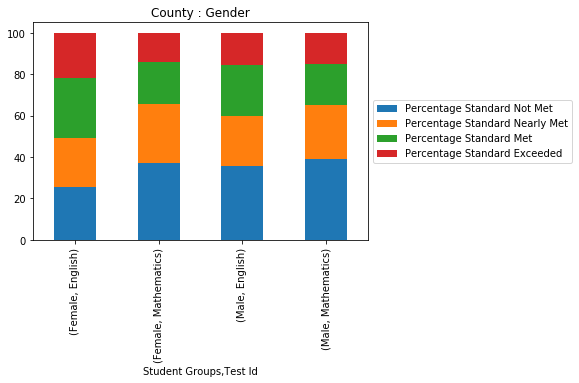

In [73]:
stackedbar(final_data, 'Gender')

County Name


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



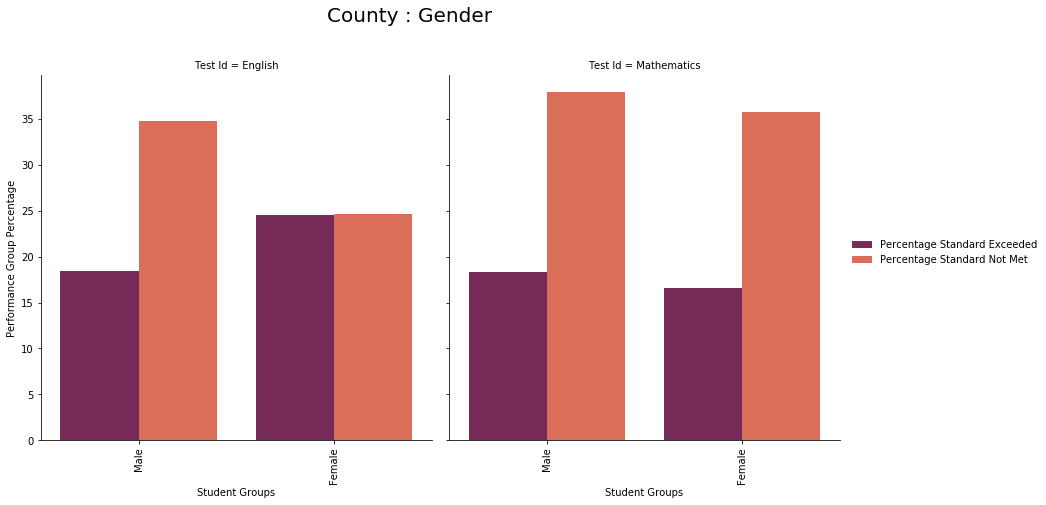

In [74]:
#FacetGrid : same legend
drawBarplotFacetGridEx(final_data_ex, 'Gender', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Ethnicity**

                                                 Percentage Standard Not Met  \
Student Groups                      Test Id                                    
American Indian or Alaska Native    English                        40.489677   
                                    Mathematics                    49.947742   
Asian                               English                        17.206667   
                                    Mathematics                    19.485897   
Black or African American           English                        40.449730   
                                    Mathematics                    51.915135   
Filipino                            English                        12.905161   
                                    Mathematics                    18.278387   
Hispanic or Latino                  English                        35.351731   
                                    Mathematics                    44.071154   
Native Hawaiian or Pacific Islander Engl

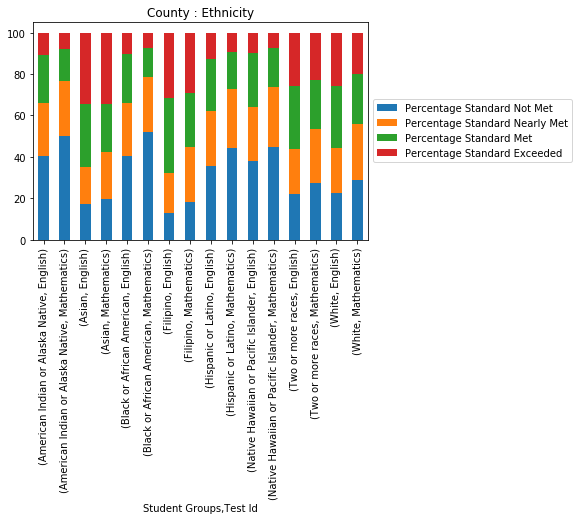

In [75]:
stackedbar(final_data, 'Ethnicity')

County Name


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



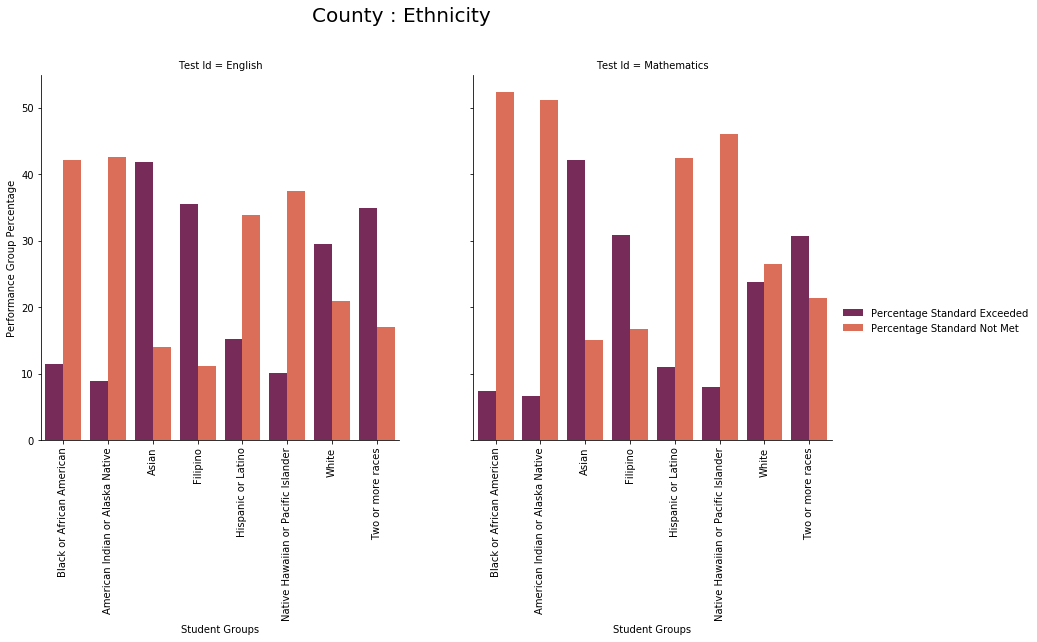

In [76]:
drawBarplotFacetGridEx(final_data_ex, 'Ethnicity', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**English-Language Fluency**

                                                                Percentage Standard Not Met  \
Student Groups                                     Test Id                                    
English learner                                    English                        61.913600   
                                                   Mathematics                    62.487600   
English learners (ELs) enrolled in school in th... English                        75.336154   
                                                   Mathematics                    71.270435   
English learners enrolled in school in the U.S.... English                        61.444286   
                                                   Mathematics                    62.727755   
English only                                       English                        28.446923   
                                                   Mathematics                    35.975000   
Ever-ELs                                          

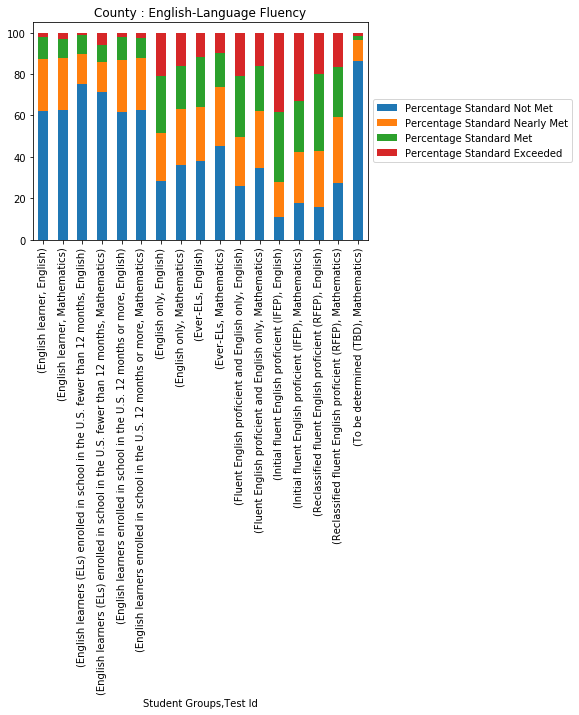

In [77]:
stackedbar(final_data, 'English-Language Fluency')

County Name


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



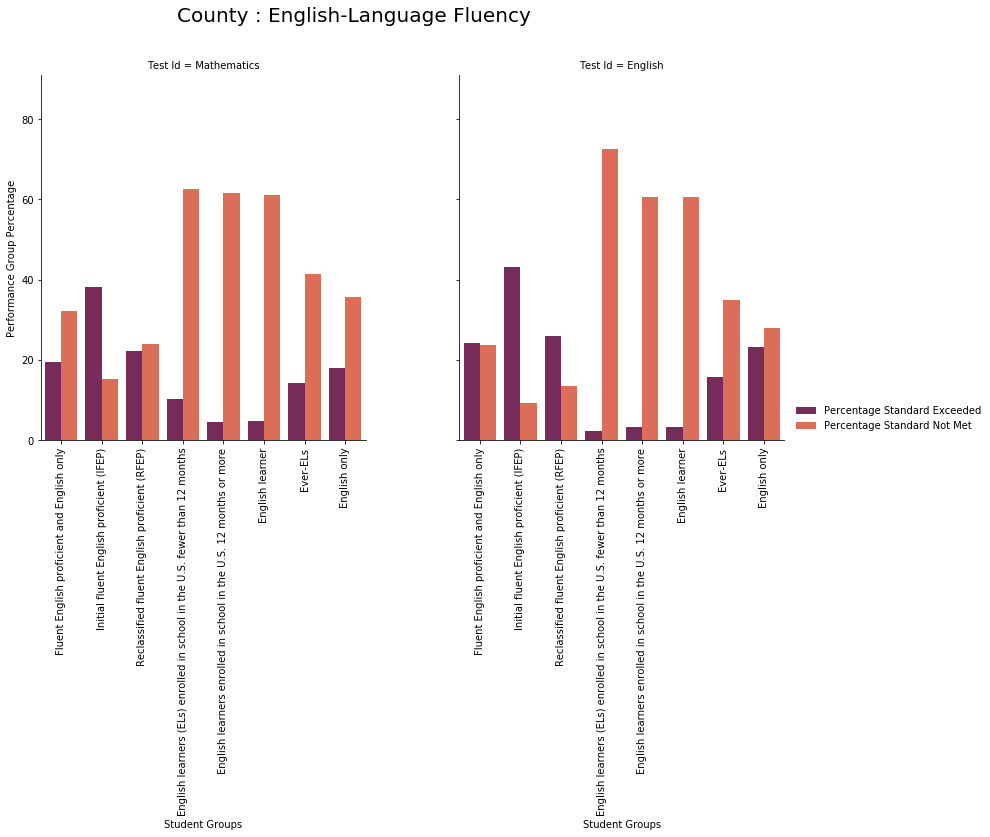

In [78]:
drawBarplotFacetGridEx(final_data_ex, 'English-Language Fluency', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Economic Status**

                                            Percentage Standard Not Met  \
Student Groups                 Test Id                                    
Economically disadvantaged     English                        37.368462   
                               Mathematics                    45.368077   
Not economically disadvantaged English                        20.149423   
                               Mathematics                    26.715385   

                                            Percentage Standard Nearly Met  \
Student Groups                 Test Id                                       
Economically disadvantaged     English                           26.059038   
                               Mathematics                       28.589615   
Not economically disadvantaged English                           21.586538   
                               Mathematics                       26.882500   

                                            Percentage Standard Met  \
Student G

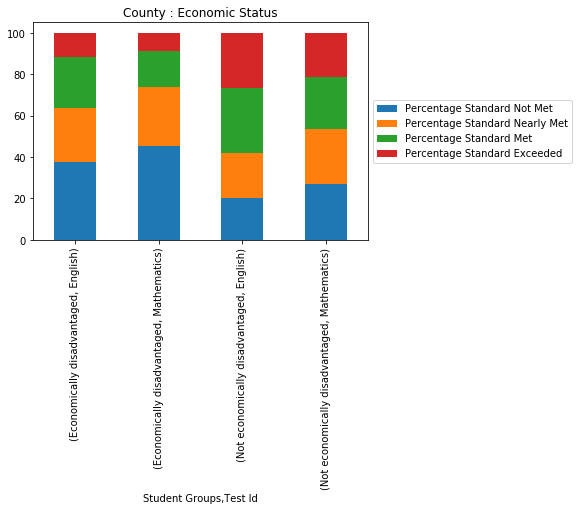

In [79]:
stackedbar(final_data, 'Economic Status')

County Name


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



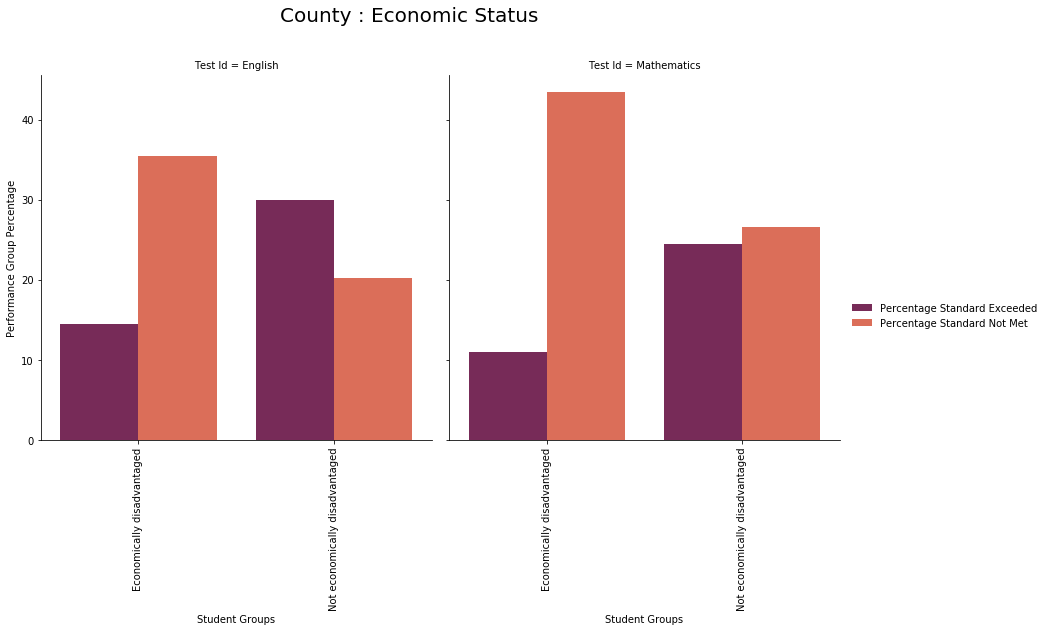

In [80]:
drawBarplotFacetGridEx(final_data_ex, 'Economic Status', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Disability Status**

                                                  Percentage Standard Not Met  \
Student Groups                       Test Id                                    
Students with disability             English                        66.714808   
                                     Mathematics                    71.055385   
Students with no reported disability English                        26.687308   
                                     Mathematics                    34.715000   

                                                  Percentage Standard Nearly Met  \
Student Groups                       Test Id                                       
Students with disability             English                           18.702308   
                                     Mathematics                       16.842115   
Students with no reported disability English                           24.725962   
                                     Mathematics                       28.380192   

        

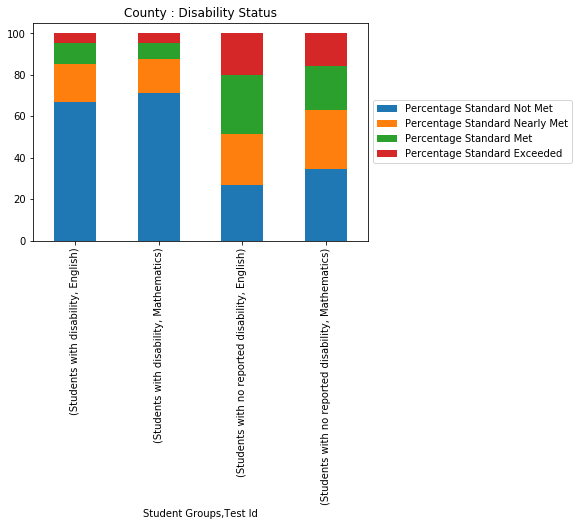

In [81]:
stackedbar(final_data, 'Disability Status')

County Name


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



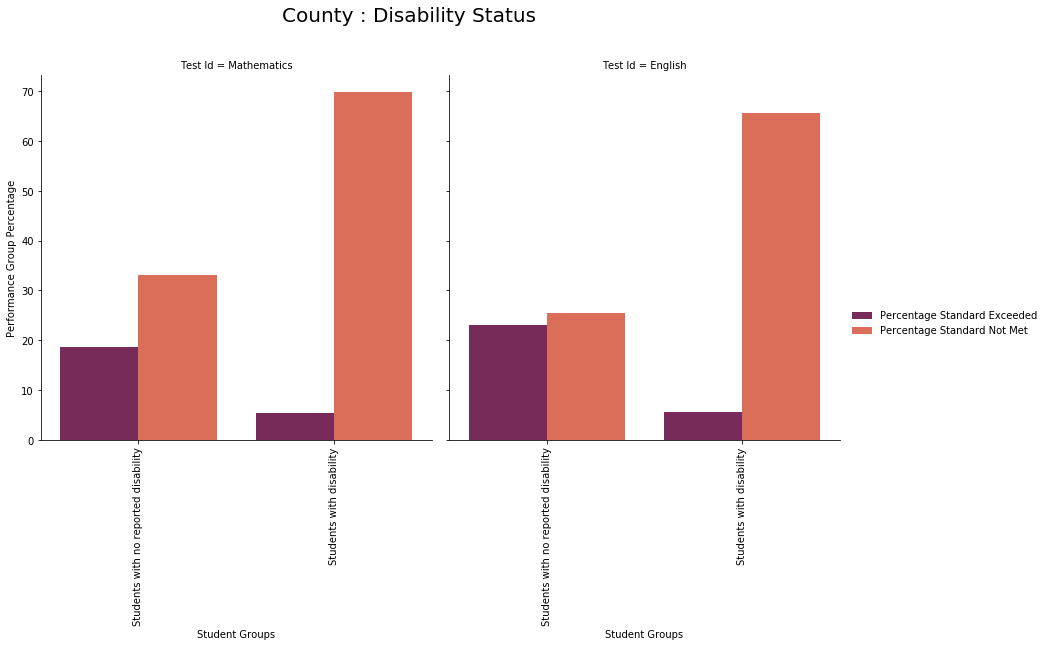

In [82]:
drawBarplotFacetGridEx(final_data_ex, 'Disability Status', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Parent Education**

                                               Percentage Standard Not Met  \
Student Groups                    Test Id                                    
College graduate                  English                        19.785000   
                                  Mathematics                    24.676346   
Declined to state                 English                        37.445000   
                                  Mathematics                    45.743000   
Graduate school/Post graduate     English                        14.473462   
                                  Mathematics                    19.458462   
High school graduate              English                        37.132500   
                                  Mathematics                    45.629423   
Not a high school graduate        English                        46.117500   
                                  Mathematics                    55.052692   
Some college (includes AA degree) English                       

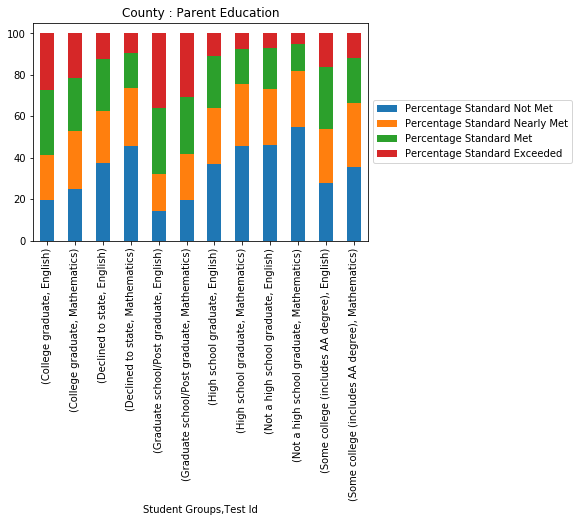

In [83]:
stackedbar(final_data, 'Parent Education')

County Name


/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



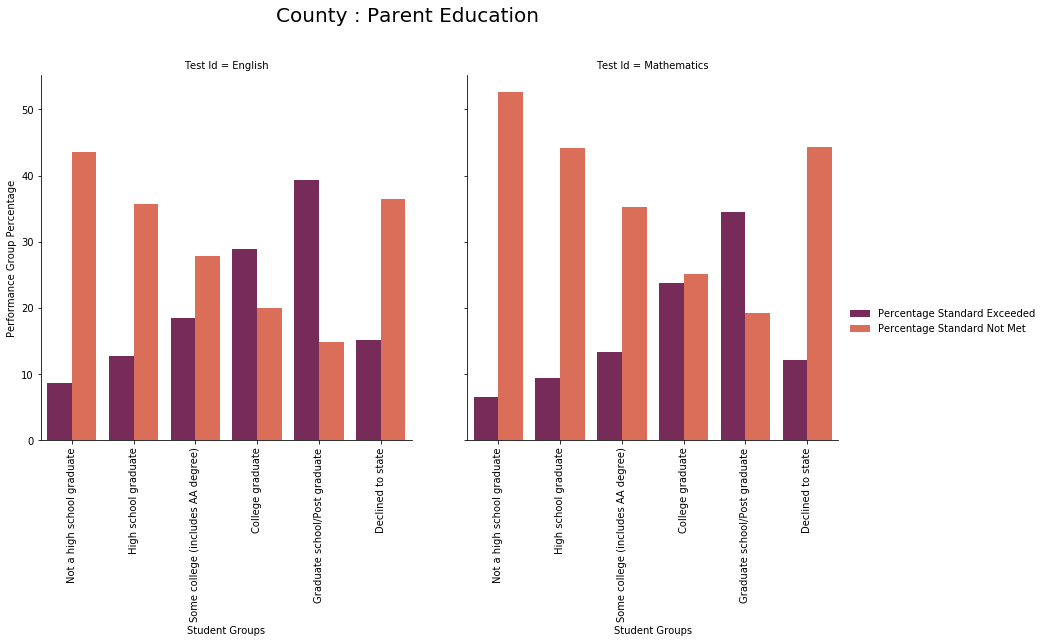

In [84]:
drawBarplotFacetGridEx(final_data_ex, 'Parent Education', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

In [85]:
#sns.set(style="whitegrid")
sns.set_style(style='ticks')
sns.set(rc={'figure.figsize':(20,16)})

## 2.2 Comparison (Bar plot)  -  Top and low performance counties

**What features can you find in the top and bottom performance groups?** 

We analyzed **5 best and worst performing counties** (58 counties x 10%).
The results can be summarized as follows.
* **English Top 5** County Names:
['Santa Clara', 'Marin', 'Placer', 'San Mateo', 'Orange']
* **Mathematics Top 5** County Names:
['Santa Clara', 'Marin', 'San Mateo', 'Orange', 'Placer']
* **English Low 5** County Names:
['Lake', 'Kings', 'Colusa', 'Humboldt', 'Monterey']
* **Mathematics Low 5** County Names:
['Lake', 'Kings', 'Merced', 'Mendocino', 'Monterey']

### [Results]

* The best performance counties have higher house median prices. In constrast, the worst performance conties have lower house median prices. **Thus, test performance is closely related to the economic capabilities of the family to which the student belongs.**

* We found that in the best performing counties, the percentage of white students is much higher than the percentage of white students in the whole county.

* Hispanic and Latino students are far more likely to be in the worst performing group than the best performing group. Likewise, black and American Indian students are more involved in the group with the worst results. In contrast, Asian and white students are more likely to be in the best performing group than the worst performing group.

* The English learners have more difficuties in studying both English and Mathematics than the fluent English speakers.

* When students' parents graduate from graduate schools/post graduates or colleges, students are much more likely to be in the best perfoming group. For those students, the best performing groups are much larger thatn the worst performing groups. In contrast, students are more likely to be in the worst perfoming group when their parents are high school graduates or have lower eduation.

### [Characteristics in the top and bottom performance groups in counties]

To have a rough insight, we have drawn the graphs of the test scores (i.e., "Performance Group Percentage" of each "Performance Group").

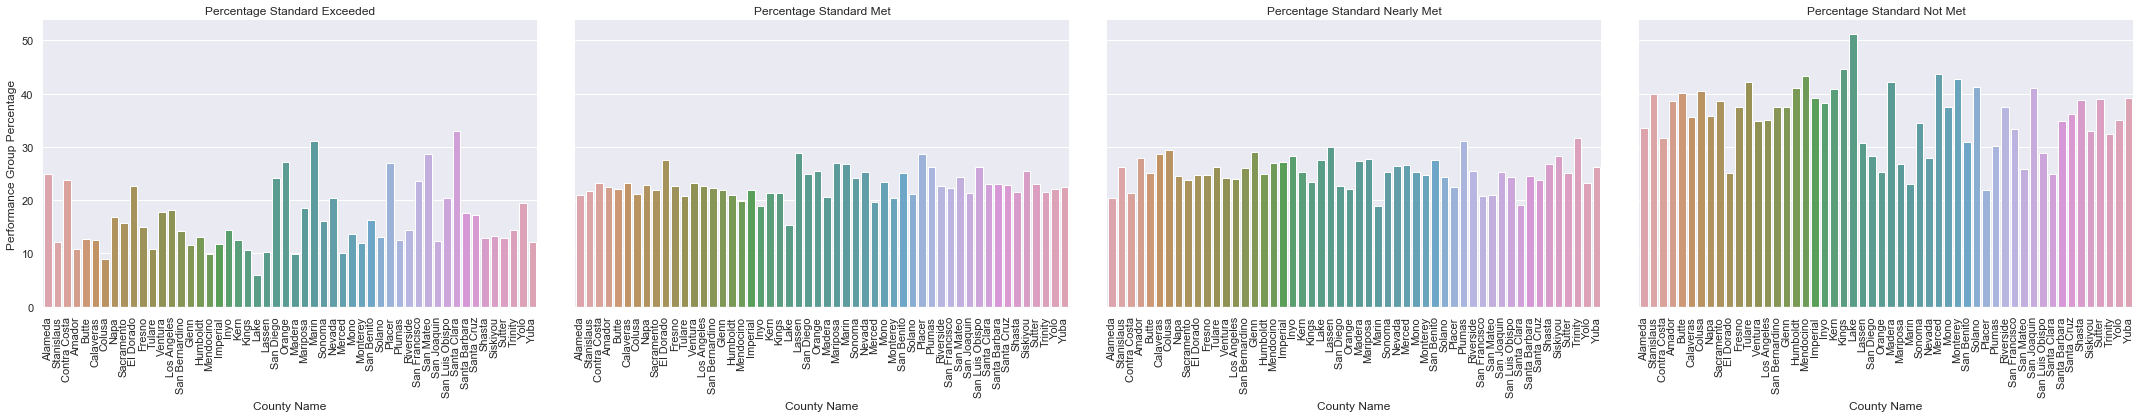

In [86]:
saturation_p =0.5
asepct_p = 1.5

def drawBarplotCatplot2(df, category, saturation_p, asepct_p, _x, _y, _col):
    df_local = df.loc[(df["Category"] == category)]
    
    #x="Student Groups", y="Students with Scores", col="Test Id", hue="Rank"
    g = sns.catplot(x=_x, y=_y, col=_col,
                data=df_local, saturation=saturation_p,
                kind="bar", ci=None, aspect=asepct_p)
    (
        g.set_axis_labels(_x, _y)
        .set_titles("{col_name}")
        .despine(left=True)
        .set_xticklabels(rotation=90)
    )  

drawBarplotCatplot2(final_data_ex, 'All Students', saturation_p, asepct_p, "County Name", "Performance Group Percentage", "Performance Group")

In [87]:
#df: data
#scoreLevel: "School Name", "District Name", "County Name"
#num: top and bottom parameter
def getDFTop_Low(df, scoreLevel, num):
    english_df = df.loc[(df["Student Groups"] == "All Students") 
                                   & (df["Test Id"] == "English")]    
    english_top = english_df.nlargest(num, 'Percentage Standard Exceeded')
    english_low = english_df.nlargest(num, 'Percentage Standard Not Met')
    
    math_df = df.loc[(df["Student Groups"] == "All Students") 
                                   & (df["Test Id"] == "Mathematics")]
    math_top = math_df.nlargest(num, 'Percentage Standard Exceeded')
    math_low = math_df.nlargest(num, 'Percentage Standard Not Met')
    
    print("{}{}{}{}{}".format("* English Top ", num, " ", scoreLevel,"s:"))
    #print Series
    print(english_top[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* Mathematics Top ", num, " ", scoreLevel,"s:"))
    print(math_top[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* English Low ", num, " ", scoreLevel,"s:"))
    print(english_low[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* Mathematics Low ", num, " ", scoreLevel,"s:"))
    print(math_low[scoreLevel].values.tolist())
    
    #Retreive all data of the top and bottom schools/districts/counties
    top_english_all = df.loc[(df[scoreLevel].isin(english_top[scoreLevel])) &
                                                  (df["Test Id"] == "English")]
    low_english_all = df.loc[(df[scoreLevel].isin(english_low[scoreLevel])) &
                                                   (df["Test Id"] == "English")]
      
    top_math_all = df.loc[(df[scoreLevel].isin(math_top[scoreLevel])) &
                                                  (df["Test Id"] == "Mathematics")]
    low_math_all = df.loc[(df[scoreLevel].isin(math_low[scoreLevel])) &
                                                   (df["Test Id"] == "Mathematics")]
    
    top_english_all["Rank"] = "Top"
    low_english_all["Rank"] = "Bottom"
    top_math_all["Rank"] = "Top"
    low_math_all["Rank"] = "Bottom"
    
    df_local = pd.concat([top_english_all, low_english_all, top_math_all, low_math_all])
    
    return df_local

In [88]:
dfTop_Low = getDFTop_Low(final_data_county, "County Name", 5)
dfTop_Low

* English Top 5 County Names:
['Santa Clara', 'Marin', 'Placer', 'San Mateo', 'Orange']
* Mathematics Top 5 County Names:
['Santa Clara', 'Marin', 'San Mateo', 'Orange', 'Placer']
* English Low 5 County Names:
['Lake', 'Kings', 'Colusa', 'Humboldt', 'Monterey']
* Mathematics Low 5 County Names:
['Lake', 'Kings', 'Merced', 'Mendocino', 'Monterey']


,County Name,Student Groups,Category,Test Id,Subgroup ID,County Code,District Code,School Code,Test Year,Type Id,Zip Code,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median,Rank
1275,Marin,All Students,All Students,English,1.0,21.0,65428.86,4843039.23,2018.0,7.0,94929.21,32.55,28.89,17.29,21.27,295.93,35.88,41.72,22.41,35.29,41.61,23.10,25.76,60.60,13.64,35.64,45.55,18.81,1227675,Top
1277,Marin,Asian,Ethnicity,English,76.0,21.0,65750.43,4986058.68,2018.0,7.0,94924.79,47.76,31.94,13.59,6.72,25.75,50.31,40.46,9.23,53.52,37.64,8.84,36.07,57.77,6.16,53.14,40.55,6.31,1246200,Top
1279,Marin,Asian,Ethnicity for Economically Disadvantaged,English,202.0,21.0,65449.75,3585184.25,2018.0,7.0,94913.50,19.44,50.88,14.66,15.03,16.25,24.20,55.08,20.72,25.84,55.42,18.74,21.82,65.36,12.82,36.01,52.67,11.32,1029675,Top
1281,Marin,Asian,Ethnicity for Not Economically Disadvantaged,English,222.0,21.0,65838.45,5233516.91,2018.0,7.0,94923.09,52.27,30.02,13.01,4.70,23.77,53.45,38.40,8.15,58.75,35.56,5.69,38.50,56.39,5.11,54.36,39.72,5.92,1306122,Top
1283,Marin,Black or African American,Ethnicity,English,74.0,21.0,65427.67,4398329.50,2018.0,7.0,94934.67,13.60,19.42,19.66,47.31,20.33,18.44,34.91,46.65,15.95,39.44,44.60,12.32,58.25,29.43,19.81,36.14,44.05,1132983,Top
1285,Marin,Black or African American,Ethnicity for Economically Disadvantaged,English,200.0,21.0,65436.00,4057820.33,2018.0,7.0,94954.33,1.08,16.71,17.31,64.90,23.33,6.75,32.49,60.76,4.62,37.11,58.28,10.64,54.77,34.59,5.00,40.32,54.68,1061933,Top
1287,Marin,Black or African American,Ethnicity for Not Economically Disadvantaged,English,220.0,21.0,65318.00,6024202.00,2018.0,7.0,94903.00,30.77,30.77,23.08,15.38,13.00,23.08,61.54,15.38,30.77,46.15,23.08,23.08,61.54,15.38,46.15,38.46,15.38,964100,Top
1289,Marin,College graduate,Parent Education,English,93.0,21.0,66474.49,5029739.51,2018.0,7.0,94931.27,41.14,33.50,15.87,9.49,105.56,44.83,43.23,11.94,43.24,45.18,11.58,33.03,59.65,7.32,44.52,46.34,9.14,1260922,Top
1291,Marin,Declined to state,Parent Education,English,121.0,21.0,60365.44,4735942.22,2018.0,7.0,94924.11,22.28,35.34,17.49,24.89,111.78,27.36,43.80,28.84,34.23,38.92,26.85,20.29,56.55,23.15,31.46,45.90,22.63,1536488,Top
1293,Marin,Economically disadvantaged,Economic Status,English,31.0,21.0,66251.59,4753899.15,2018.0,7.0,94927.30,13.79,26.04,24.13,36.04,103.35,18.07,46.47,35.46,18.02,44.03,37.95,13.70,62.92,23.38,19.04,49.76,31.21,1170354,Top


**House Prices**

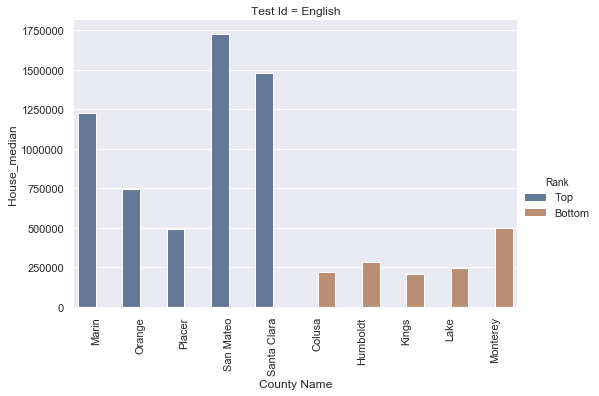

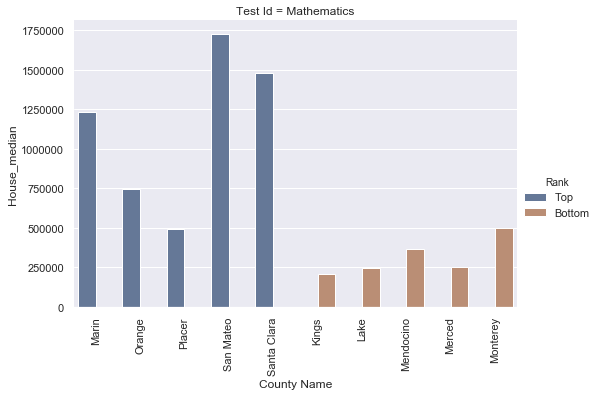

In [89]:
def drawBarplotCatplot1(df, category, testId, _x, _y, _hue, _col):
    df_local = df.loc[(df["Category"] == category) & (df['Test Id'] == testId)]
    g = sns.catplot(x=_x, y=_y, hue=_hue, col=_col,
                    data=df_local, saturation=saturation_p,
                    kind="bar", ci=None, aspect=asepct_p)
    (g.set_axis_labels(_x, _y)
     # .set_xticklabels(["Men", "Women", "Children"])
     #.set(ylim=(0, 1))
     .despine(left=True)
     .set_xticklabels(rotation=90))  

drawBarplotCatplot1(dfTop_Low, "All Students", "English", "County Name", "House_median", "Rank", "Test Id")
drawBarplotCatplot1(dfTop_Low, "All Students", "Mathematics", "County Name", "House_median", "Rank", "Test Id")

#drawBarplotCatplot(dfTop_Low, "All Students", saturation_p, asepct_p, "County Name", "House_median", "Test Id", "Rank")

In [90]:
def drawBarplotCatplot(df, category, saturation_p, asepct_p, _x, _y, _col, _hue):
    df_local = df.loc[(df["Category"] == category)]
    
    #x="Student Groups", y="Students with Scores", col="Test Id", hue="Rank"
    g = sns.catplot(x=_x, y=_y, col=_col, hue=_hue,
                data=df_local, saturation=saturation_p,
                kind="bar", ci=None, aspect=asepct_p)
    (
        g.set_axis_labels(category, "Number of Students")
        # .set_xticklabels(["Men", "Women", "Children"])
        .set_titles("{col_name} {col_var}")
        #  .set(ylim=(0, 1))
        .despine(left=True)
        .set_xticklabels(rotation=90)
    )  

**Gender**

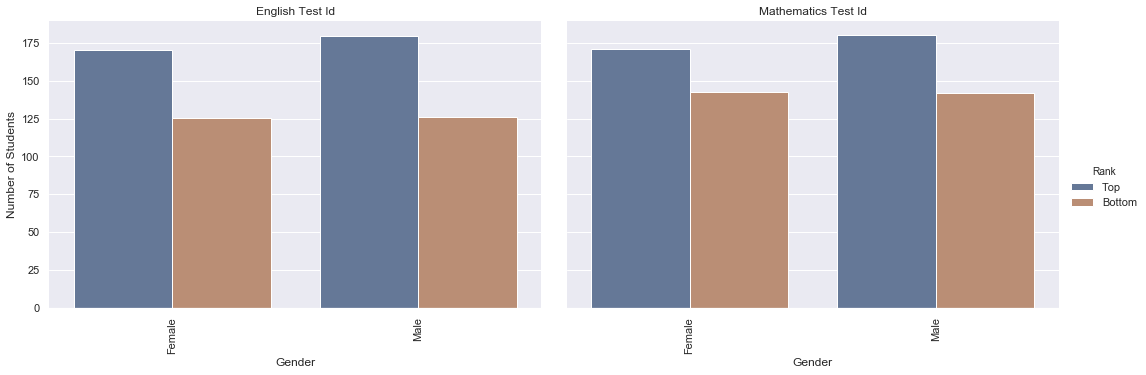

In [91]:
drawBarplotCatplot(dfTop_Low, "Gender", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Ethnicity**

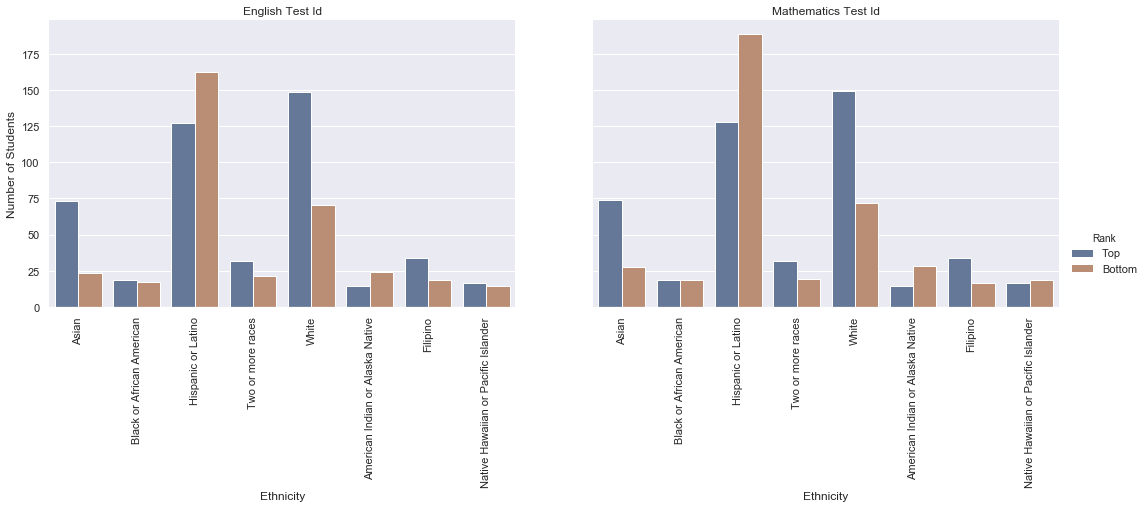

In [92]:
drawBarplotCatplot(dfTop_Low, "Ethnicity", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**English-Language Fluency**

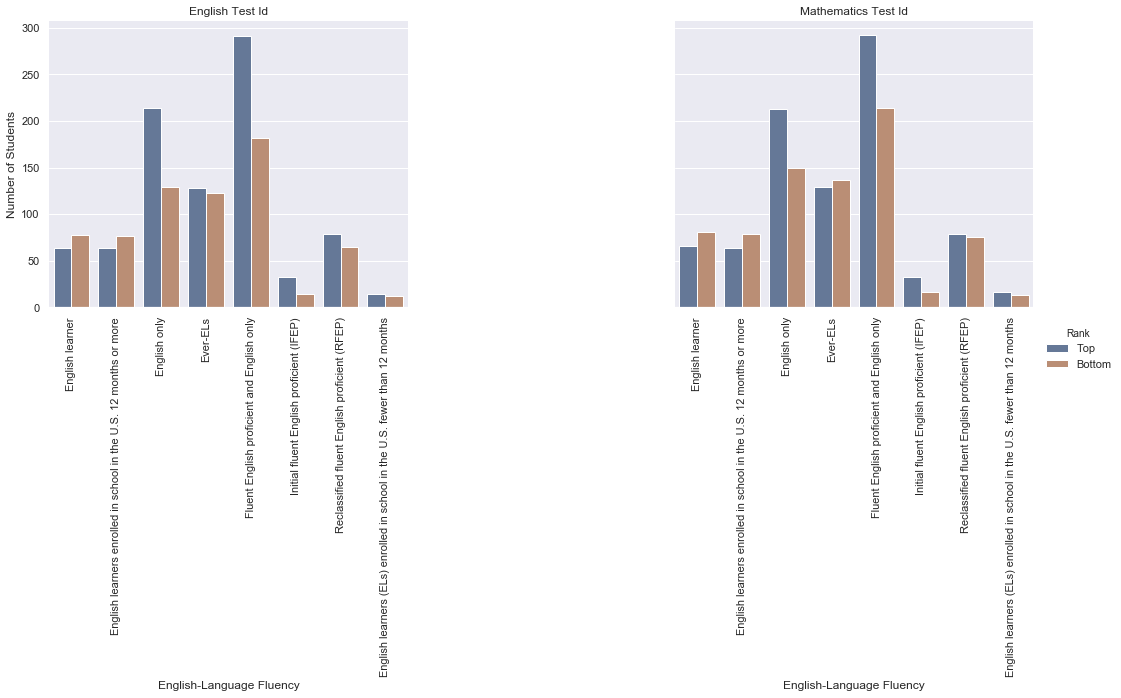

In [93]:
drawBarplotCatplot(dfTop_Low, "English-Language Fluency", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Economic Status**

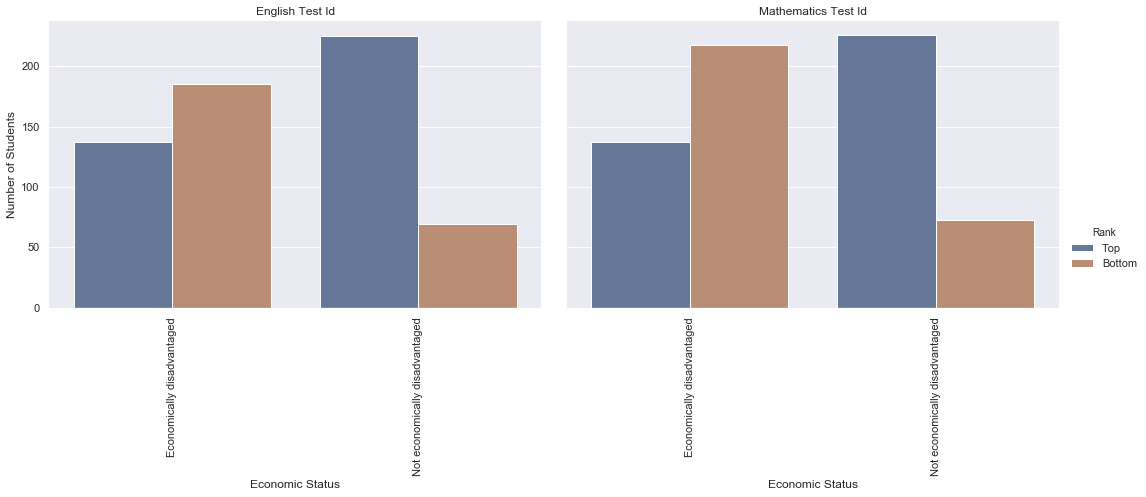

In [94]:
drawBarplotCatplot(dfTop_Low, "Economic Status", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Parent Education**

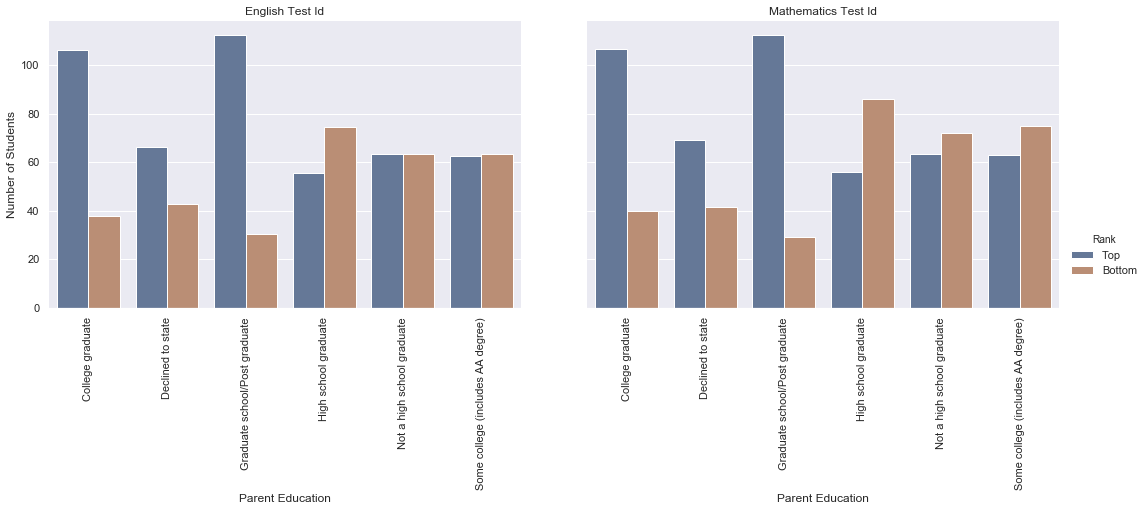

In [95]:
drawBarplotCatplot(dfTop_Low, "Parent Education", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

### [Individual Top and Bottom schools in Each Category]

In [96]:
#List of data of the best performance students for each student groups
idx = final_data_school.groupby(["Category", "Student Groups"])["Percentage Standard Exceeded"].transform(max) == final_data_school["Percentage Standard Exceeded"]
final_data_school[idx]

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
6874,1,All Students,All Students,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,92.82,6.22,0.96,0.00,209.0,95.69,4.31,0.00,88.04,11.96,0.00,89.95,10.05,0.00,0.00,0.00,0.00,1092600
25992,3,Male,Gender,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,94.37,4.93,0.70,0.00,142.0,97.18,2.82,0.00,88.03,11.97,0.00,90.85,9.15,0.00,0.00,0.00,0.00,1092600
42161,4,Female,Gender,19,64212,1931880,2018,7,Los Angeles,Abc Unified,Whitney (Gretchen) High,90703,English,91.48,8.20,0.33,0.00,305.0,90.49,9.51,0.00,94.43,5.25,0.33,67.21,32.79,0.00,91.15,8.85,0.00,722800
63762,6,Fluent English proficient and English only,English-Language Fluency,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,92.82,6.22,0.96,0.00,209.0,95.69,4.31,0.00,88.04,11.96,0.00,89.95,10.05,0.00,0.00,0.00,0.00,1092600
76596,7,Initial fluent English proficient (IFEP),English-Language Fluency,1,61275,6002281,2018,7,Alameda,Piedmont City Unified,Beach Elementary,94611,English,100.00,0.00,0.00,0.00,11.0,90.91,9.09,0.00,72.73,27.27,0.00,72.73,27.27,0.00,90.91,9.09,0.00,1287100
76597,7,Initial fluent English proficient (IFEP),English-Language Fluency,1,61275,6002281,2018,7,Alameda,Piedmont City Unified,Beach Elementary,94611,Mathematics,100.00,0.00,0.00,0.00,11.0,100.00,0.00,0.00,100.00,0.00,0.00,90.91,9.09,0.00,0.00,0.00,0.00,1287100
76986,7,Initial fluent English proficient (IFEP),English-Language Fluency,7,61812,6005243,2018,7,Contra Costa,Walnut Creek Elementary,Walnut Heights Elementary,94596,Mathematics,100.00,0.00,0.00,0.00,12.0,100.00,0.00,0.00,100.00,0.00,0.00,83.33,16.67,0.00,0.00,0.00,0.00,1018300
81922,7,Initial fluent English proficient (IFEP),English-Language Fluency,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,100.00,0.00,0.00,0.00,35.0,100.00,0.00,0.00,88.57,11.43,0.00,97.14,2.86,0.00,0.00,0.00,0.00,1092600
84397,7,Initial fluent English proficient (IFEP),English-Language Fluency,30,66647,6097000,2018,7,Orange,Placentia-Yorba Linda Unified,Woodsboro Elementary,92807,Mathematics,100.00,0.00,0.00,0.00,22.0,100.00,0.00,0.00,95.45,4.55,0.00,95.45,4.55,0.00,0.00,0.00,0.00,719700
88066,7,Initial fluent English proficient (IFEP),English-Language Fluency,37,68296,6110878,2018,7,San Diego,Poway Unified,Adobe Bluffs Elementary,92129,English,100.00,0.00,0.00,0.00,14.0,78.57,21.43,0.00,78.57,21.43,0.00,64.29,35.71,0.00,85.71,14.29,0.00,789900


In [97]:
#List of data of the lowest performance students for each student groups
idx = final_data_school.groupby(["Category", "Student Groups"])["Percentage Standard Not Met"].transform(max) == final_data_school["Percentage Standard Not Met"]
final_data_school[idx]

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
12,1,All Students,All Students,1,61259,132688,2018,7,Alameda,Oakland Unified,Dewey Academy,94606,Mathematics,0.0,0.00,0.00,100.00,37.0,0.00,0.00,100.00,0.00,18.92,81.08,0.00,10.81,89.19,0.0,0.00,0.00,684400
70,1,All Students,All Students,1,10017,130419,2018,7,Alameda,Alameda County Office Of Education,Alameda County Community,94544,Mathematics,0.0,0.00,0.00,100.00,30.0,0.00,0.00,100.00,0.00,6.67,93.33,0.00,16.67,83.33,0.0,0.00,0.00,649300
112,1,All Students,All Students,1,61259,130146,2018,7,Alameda,Oakland Unified,Rudsdale Continuation,94605,Mathematics,0.0,0.00,0.00,100.00,48.0,0.00,0.00,100.00,0.00,6.25,93.75,0.00,25.00,75.00,0.0,0.00,0.00,655900
113,1,All Students,All Students,1,61259,130146,2018,7,Alameda,Oakland Unified,Rudsdale Continuation,94605,English,0.0,0.00,0.00,100.00,48.0,0.00,20.83,79.17,0.00,0.00,100.00,0.00,31.25,68.75,0.0,8.33,91.67,655900
1058,1,All Students,All Students,7,10074,120444,2018,7,Contra Costa,Contra Costa County Office Of Education,Mt. Mckinley,94553,Mathematics,0.0,0.00,0.00,100.00,60.0,0.00,0.00,100.00,0.00,10.00,90.00,0.00,28.33,71.67,0.0,0.00,0.00,613200
1435,1,All Students,All Students,28,66266,128314,2018,7,Napa,Napa Valley Unified,Legacy High,94503,Mathematics,0.0,0.00,0.00,100.00,11.0,0.00,0.00,100.00,0.00,18.18,81.82,0.00,54.55,45.45,0.0,0.00,0.00,550500
1800,1,All Students,All Students,10,73965,114751,2018,7,Fresno,Central Unified,Pathway Community Day,93706,Mathematics,0.0,0.00,0.00,100.00,19.0,0.00,0.00,100.00,0.00,0.00,100.00,0.00,10.53,89.47,0.0,0.00,0.00,130400
2015,1,All Students,All Students,10,62125,1030113,2018,7,Fresno,Coalinga-Huron Unified,Cambridge High,93210,Mathematics,0.0,0.00,0.00,100.00,28.0,0.00,0.00,100.00,0.00,14.29,85.71,0.00,32.14,67.86,0.0,0.00,0.00,162700
2065,1,All Students,All Students,10,62166,1031632,2018,7,Fresno,Fresno Unified,Dewolf Continuation High,93703,Mathematics,0.0,0.00,0.00,100.00,46.0,0.00,0.00,100.00,0.00,11.11,88.89,0.00,32.61,67.39,0.0,0.00,0.00,163600
2449,1,All Students,All Students,10,73999,1033422,2018,7,Fresno,Kerman Unified,Enterprise High,93630,Mathematics,0.0,0.00,0.00,100.00,22.0,0.00,0.00,100.00,0.00,9.09,90.91,0.00,18.18,81.82,0.0,0.00,0.00,226700


## 2.3 Correlations (Scatterplot)

We provide the scatter plots between two following factors.  
* Percentage of Standard Exceeded vs. House prices
* Percentage of Standard Not Met vs. House prices
   
### [Results]
We could observe the strong correlations between the test scores and the house prices.
In conclusion, students who live in areas with high housing prices have higher test scores.

In [98]:
def drawScatterplot(df, category, levelName, perfCol):
    df_local = df.loc[(df['Category'] == category)]
    #g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups")
    g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups", size=10)
    g.map(plt.scatter, levelName, perfCol, alpha=.7)
    g.add_legend();
    g.set_xticklabels(rotation=90) 

#drawScatterplot(final_data, 'Ethnicity', "County Name", 'Percentage Standard Not Met')

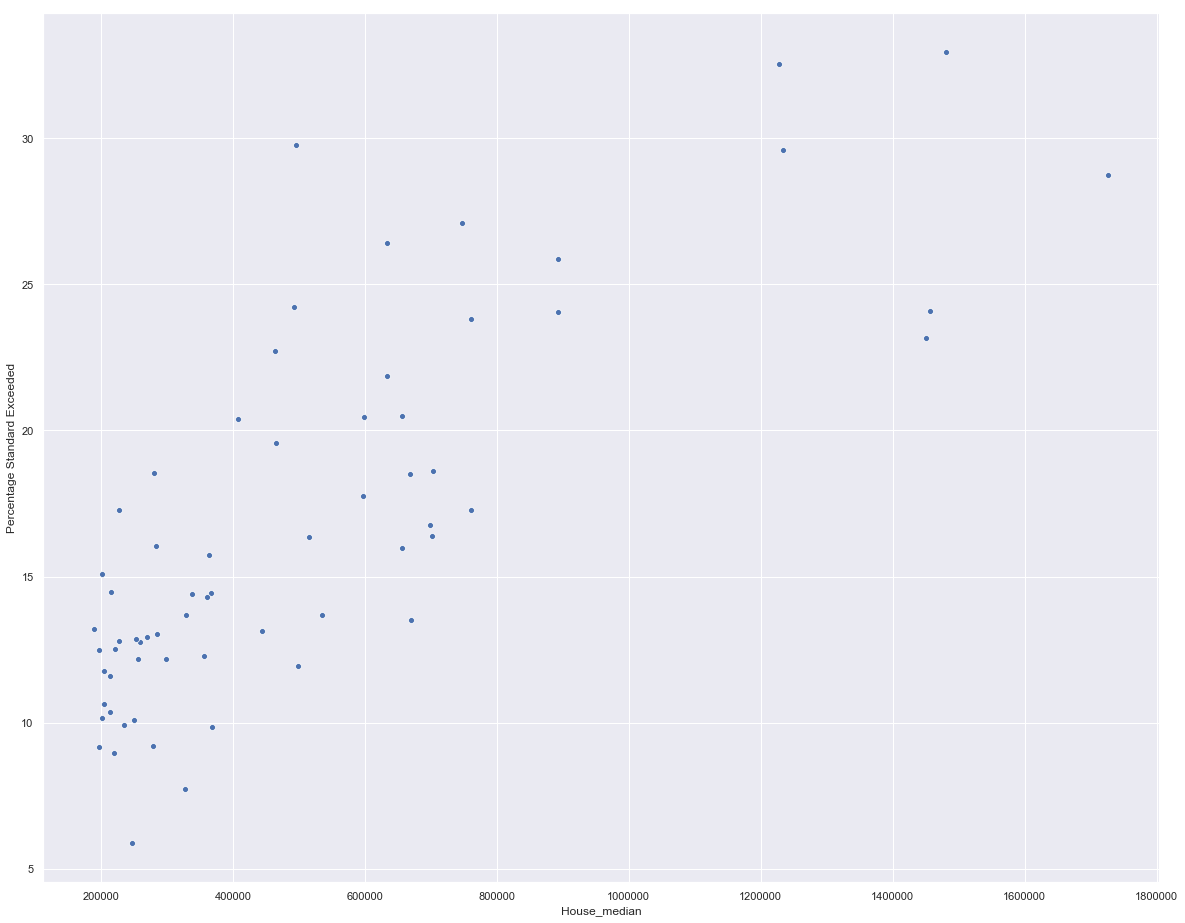

In [99]:
df_local = final_data.loc[(final_data['Student Groups'] == "All Students")].groupby('School Code').mean()
ax = sns.scatterplot(x="House_median", y='Percentage Standard Exceeded', data=df_local)

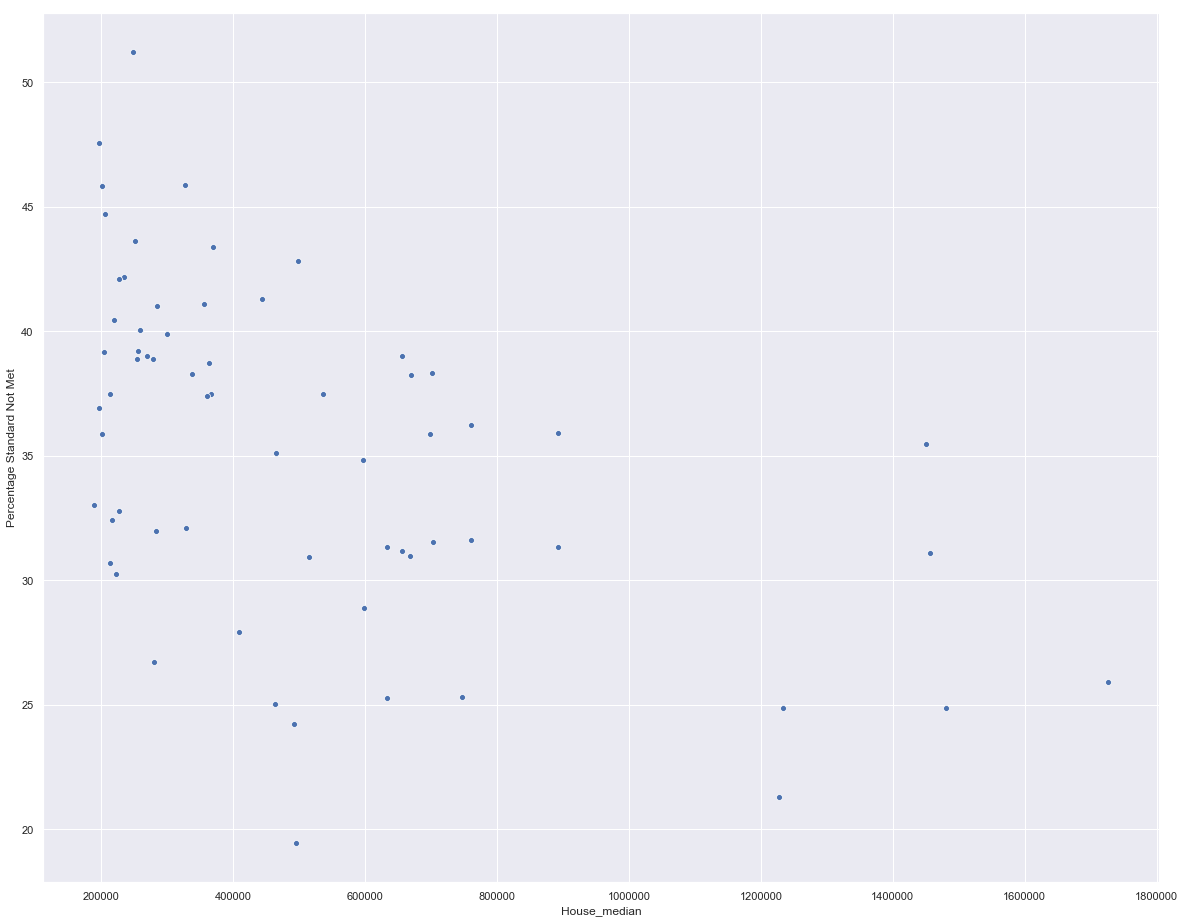

In [100]:
df_local = final_data.loc[(final_data['Student Groups'] == "All Students")].groupby('School Code').mean()
ax = sns.scatterplot(x="House_median", y='Percentage Standard Not Met', data=df_local)

## 2.4 Distribution (Histogram)

TBD

## 2.5 Time-Series Plot

TBD

## 2.6 Future Work (To consider more)

**To Be Developed (TBD)**  
* Time-Series plots
    * Year 2015, 2016, 2017, 2018: Percentage of Standard Exceeded of (current year - last year)] 
* Histogram
    * House price correlation with the test performance (bin 10: house_cost <25K, ...., house_cost > 100k)
* More external factors
    * Teachers demographics
* Bokeh or Plotly libraries 
    * Switch barplots to interactive graphs
    * Longitude, latitude information to visualize the score distribution on the map (Plotly libraries)
* Use more of special metrics
    * Ex) Score_gap = |Standard Exceeded % - Standard Not Met %|

**Need to be more consider**  
* Not all data available for subgroups - skewed?
* Need to eliminate outliers?
    * Ex) (new schools (e.g., Eastwood elementary), etc.) - top and bottom 5% schools need to be excluded.
* Further analysis on the High-income whites vs. Low-income whites 
    * Ex) (df.loc[(df['House_median'] > 130k) & (df['Subgroup Id'] == whites)]
* More insights? Trends? More hypothesis?
    * Much more score differnces in mathematics in (high schools groups / minority groups)

In [101]:
#replace plotly -> bokeh
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
#math_top.iplot(kind='bar', barmode='stack', filename='cufflinks/stacked-bar-chart') 

# Miscellaneous

**Functions**

In [102]:
#Create a column "ratio"
#scoreLevel: "School Name", "District Name", "County Name"
def createColumnApply(df, scoreLevel, category, sum_col, new_col):

    #flatten multi index for the results obtained from groupby
    df_sum = df.groupby([scoreLevel, category], as_index=False).sum()
    #create new column "Scores_sum": sum grouped by category 
    #Example: new_col = "Scores_sum", sum_col = "Students with Scores"
    df_sum[new_col] = df_sum[sum_col]

    df_newcol = pd.merge(df, df_sum[[scoreLevel, category, new_col]], 
                                           how='left', on=[scoreLevel, category])

    #create a new column using lambda func.
    #axis = 1 or ‘columns’: apply function to each row
    #apply function should be modified for the usage
    df_newcol["ratio"] = df_newcol.apply(lambda x: x[sum_col]/x[new_col]*100, axis=1)
    #Formatted to second decimal place
    df_newcol = df_newcol.round(2)

In [103]:
#ive District Code with District Name from entities DataFrame

school_code_dict = {}

def make_code_dict(code, name):   
    if code not in school_code_dict.keys():
        school_code_dict[code] = name

code = entities.loc[(entities['District Name'] == 'Irvine Unified'), ['District Code']].iloc[0][0]
name = 'Irvine Unified'

#make the input parameter dataframe (Series of school names and get the codes)
make_code_dict(code, name)

print(school_code_dict)

{73650: 'Irvine Unified'}


In [104]:
def drawBarplotFacetGrid(df, category, perfCol1, perfCol2):
    df_local = df.loc[(df['Category'] == category)]
    
    g = sns.FacetGrid(df_local, col="Test Id", row_order=perfCol1)
    g.map(sns.barplot, "Student Groups", perfCol1)
    g.add_legend()
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(category, size=20)
    g.fig.subplots_adjust(top=.9)
    plt.show()
   
    g = sns.FacetGrid(df_local, col="Test Id", row_order=perfCol2)
    g.map(sns.barplot, "Student Groups", perfCol2)
    g.add_legend()
    g.set_xticklabels(rotation=90)
    plt.show()
    
#drawBarplotFacetGrid(final_data, 'Gender', 'Percentage Standard Not Met', 'Percentage Standard Exceeded')

**drawBarplot counties**

**TBD: better draw in one figure to use the same y legends**

In [105]:
#'Performance Group'
def drawBarplotCDS(df, category, perfCols, levelName):
    df_local0 = df.loc[(df['Category'] == category) & (df['Performance Group'] == perfCols[0])]
    df_local1 = df.loc[(df['Category'] == category) & (df['Performance Group'] == perfCols[1])]
    #scoreLevel = getScoreLevel(df_local)
    
    f, axes = plt.subplots(1, 2)
    
    sns.barplot(x=levelName, y='Performance Group Percentage', hue="Test Id",  data=df_local0, ax=axes[0], ci=None, n_boot=0)
    sns.barplot(x=levelName, y='Performance Group Percentage', hue="Test Id",  data=df_local1, ax=axes[1], ci=None, n_boot=0)
    
    f.suptitle(category, size=24)
    axes[0].set_title(perfCols[0]) 
    axes[1].set_title(perfCols[1])
    
    for ax in f.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)

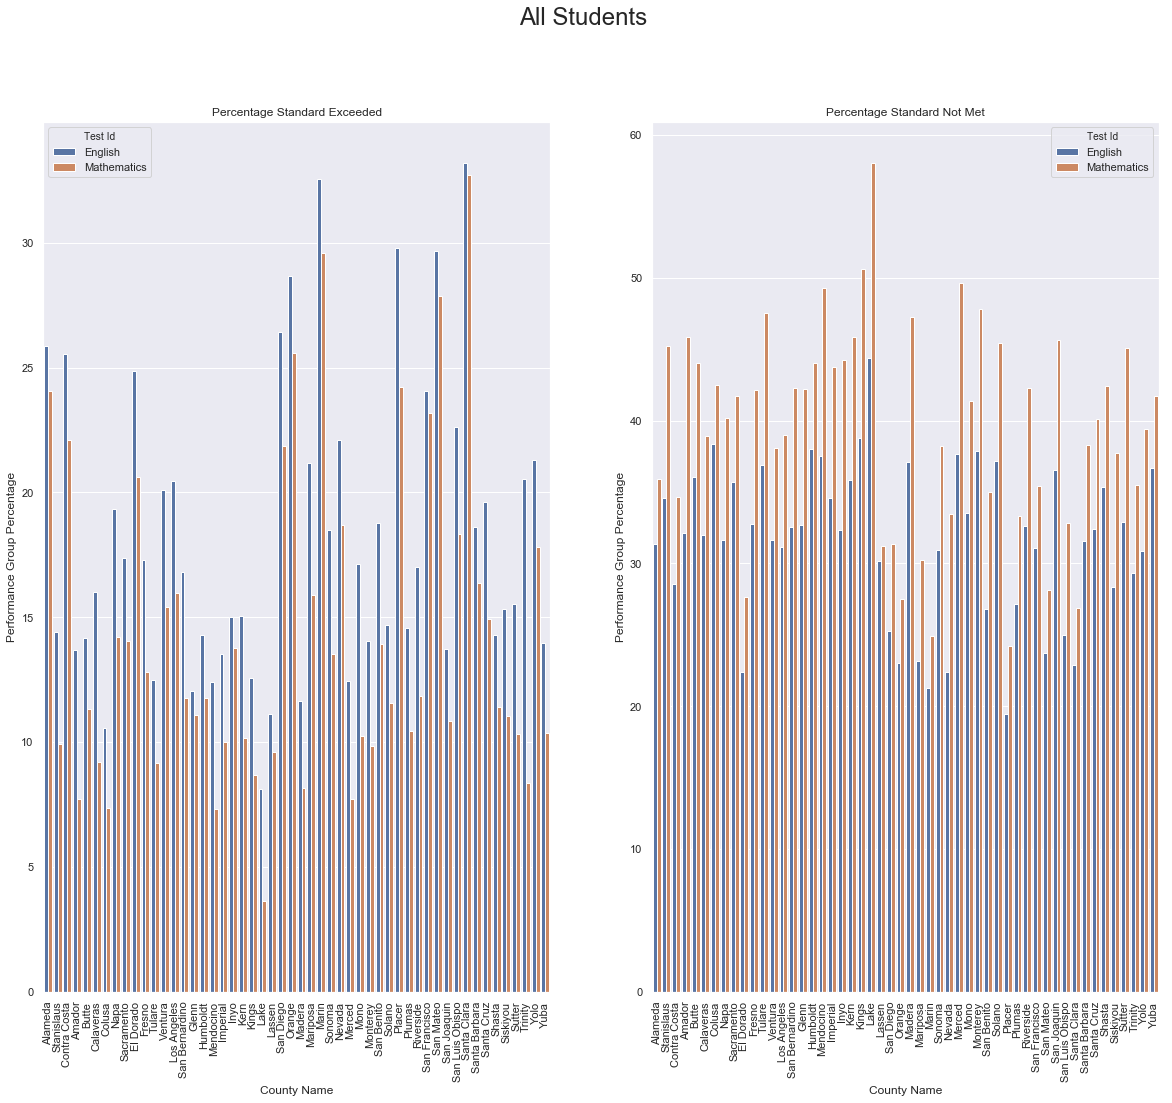

In [106]:
drawBarplotCDS(final_data_ex, 'All Students', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'], "County Name")

**Special Individual Interest**

In [107]:
def drawBarplotSchool(df, category, testId1, testId2, levelName, perfCol, rank):
        df_local1 = df.loc[(df['Category'] == category) & (df['Test Id'] == testId1) & (df['Rank'] == rank)]
        df_local2 = df.loc[(df['Category'] == category) & (df['Test Id'] == testId2) & (df['Rank'] == rank)]
        f, axes = plt.subplots(1, 2)

        sns.barplot(x=levelName, y=perfCol, hue="Student Groups",  data=df_local1, ax=axes[0], ci=None, n_boot=0)
        sns.barplot(x=levelName, y=perfCol, hue="Student Groups",  data=df_local2, ax=axes[1], ci=None, n_boot=0)

        f.suptitle(rank  + " Rank\n" + category, size=24)
        axes[0].set_title(testId1) 
        axes[1].set_title(testId2)

        for ax in f.axes:
            plt.sca(ax)
            plt.xticks(rotation=90)

# 'School Name', 'District Name'
#drawBarplot(final_data, 'Gender', 'English', 'Mathematics', 'County Name', 'Percentage Standard Exceeded')
#drawBarplot(final_data, 'Gender', 'English', 'Mathematics', 'County Name', 'Percentage Standard Not Met')

In [108]:
#retreive only "Elementary schools"
irvine_district_elementary = irvine_district[irvine_district["School Name"].str.contains('Elementary')]
#number of elementary schools in Irvine: 23
#irvine_district_elementary["School Name"].nunique()
irvine_district_elementary

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
10084,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,Mathematics,49.72,22.33,16.89,11.07,533.0,57.41,26.45,16.14,49.53,36.40,14.07,49.91,38.46,11.63,0.00,0.00,0.00,927300
10085,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,English,50.48,29.09,10.60,9.83,519.0,45.28,43.55,11.18,53.95,34.10,11.95,41.04,51.64,7.32,54.14,36.99,8.86,927300
10086,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300
10087,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300
10090,1,All Students,All Students,30,73650,6085344,2018,7,Orange,Irvine Unified,Woodbury Elementary,92620,Mathematics,38.43,32.44,19.21,9.92,635.0,52.60,30.87,16.54,42.83,42.83,14.33,44.41,42.52,13.07,0.00,0.00,0.00,927300
10091,1,All Students,All Students,30,73650,6085344,2018,7,Orange,Irvine Unified,Woodbury Elementary,92620,English,48.63,25.76,16.43,9.18,621.0,43.00,43.64,13.37,51.69,36.07,12.24,32.21,60.39,7.41,50.89,38.81,10.31,927300
10092,1,All Students,All Students,30,73650,6096192,2018,7,Orange,Irvine Unified,Stonegate Elementary,92620,Mathematics,59.65,23.92,13.56,2.87,627.0,71.45,21.69,6.86,55.18,39.87,4.94,60.13,34.77,5.10,0.00,0.00,0.00,927300
10093,1,All Students,All Students,30,73650,6096192,2018,7,Orange,Irvine Unified,Stonegate Elementary,92620,English,64.00,20.96,10.08,4.96,625.0,56.64,37.28,6.08,63.52,30.72,5.76,43.84,53.28,2.88,65.44,30.24,4.32,927300
10094,1,All Students,All Students,30,73650,6098529,2018,7,Orange,Irvine Unified,Santiago Hills Elementary,92620,Mathematics,65.74,18.38,10.03,5.85,359.0,74.93,16.71,8.36,63.79,29.25,6.96,64.35,27.02,8.64,0.00,0.00,0.00,927300
10095,1,All Students,All Students,30,73650,6098529,2018,7,Orange,Irvine Unified,Santiago Hills Elementary,92620,English,64.25,22.07,7.54,6.15,358.0,61.73,32.12,6.15,64.80,25.98,9.22,45.25,48.88,5.87,65.92,27.93,6.15,927300


**TBD: better draw in one figure to use the same y legends**

* English Top 5 School Names:
['Turtle Rock Elementary', 'Santiago Hills Elementary', 'Stonegate Elementary', 'Brywood Elementary', 'Portola Springs Elementary']
* Mathematics Top 5 School Names:
['Turtle Rock Elementary', 'Santiago Hills Elementary', 'Brywood Elementary', 'Stonegate Elementary', 'Westpark Elementary']
* English Low 5 School Names:
['Culverdale Elementary', 'University Park Elementary', 'Springbrook Elementary', 'Greentree Elementary', 'Eastwood Elementary']
* Mathematics Low 5 School Names:
['Culverdale Elementary', 'University Park Elementary', 'Northwood Elementary', 'Springbrook Elementary', 'Greentree Elementary']


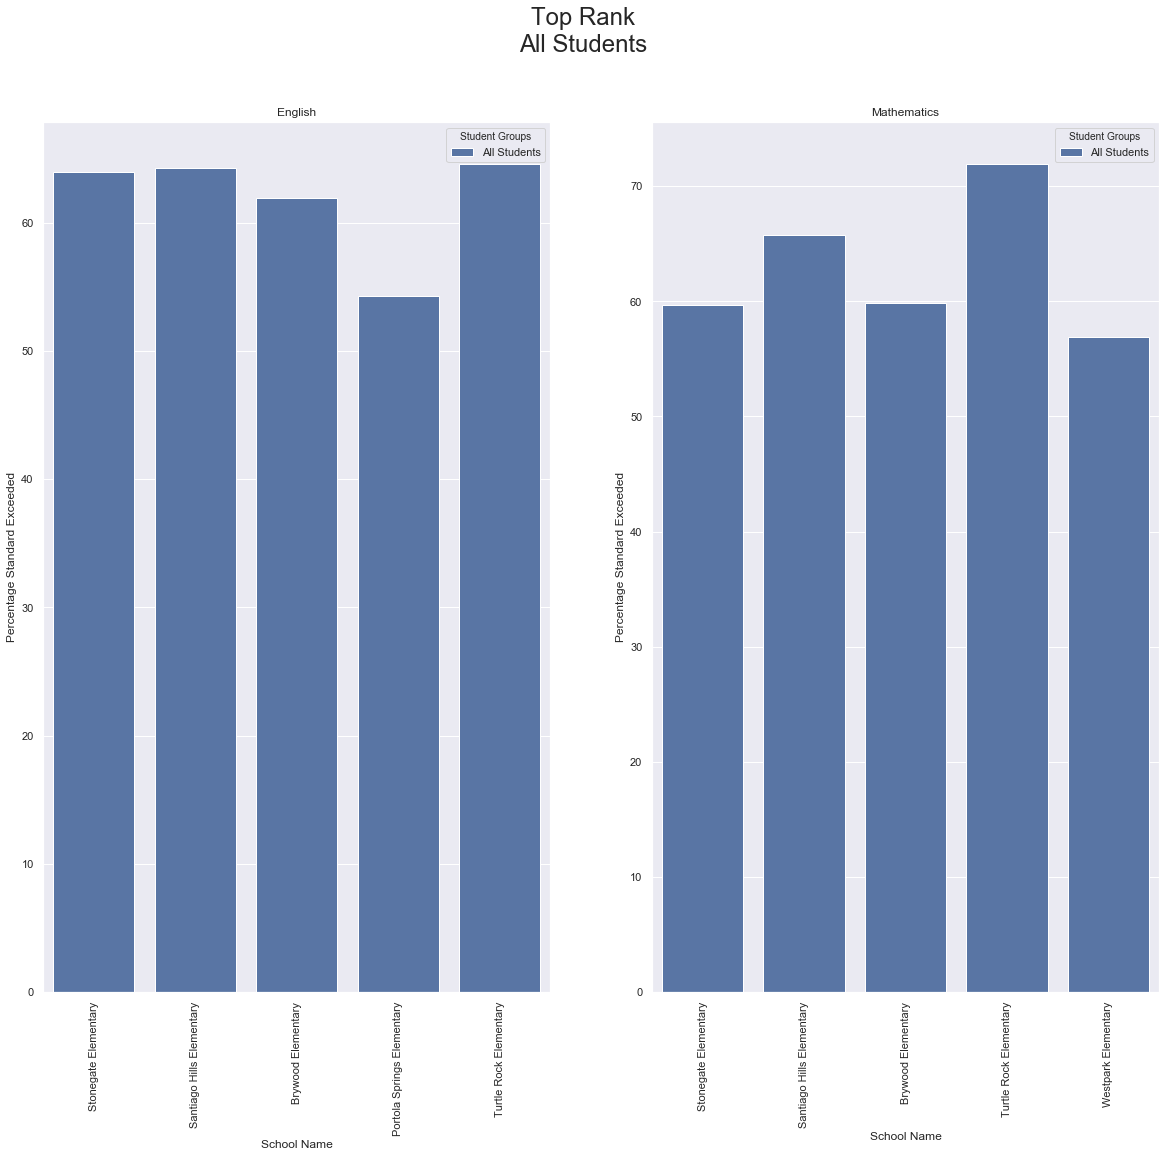

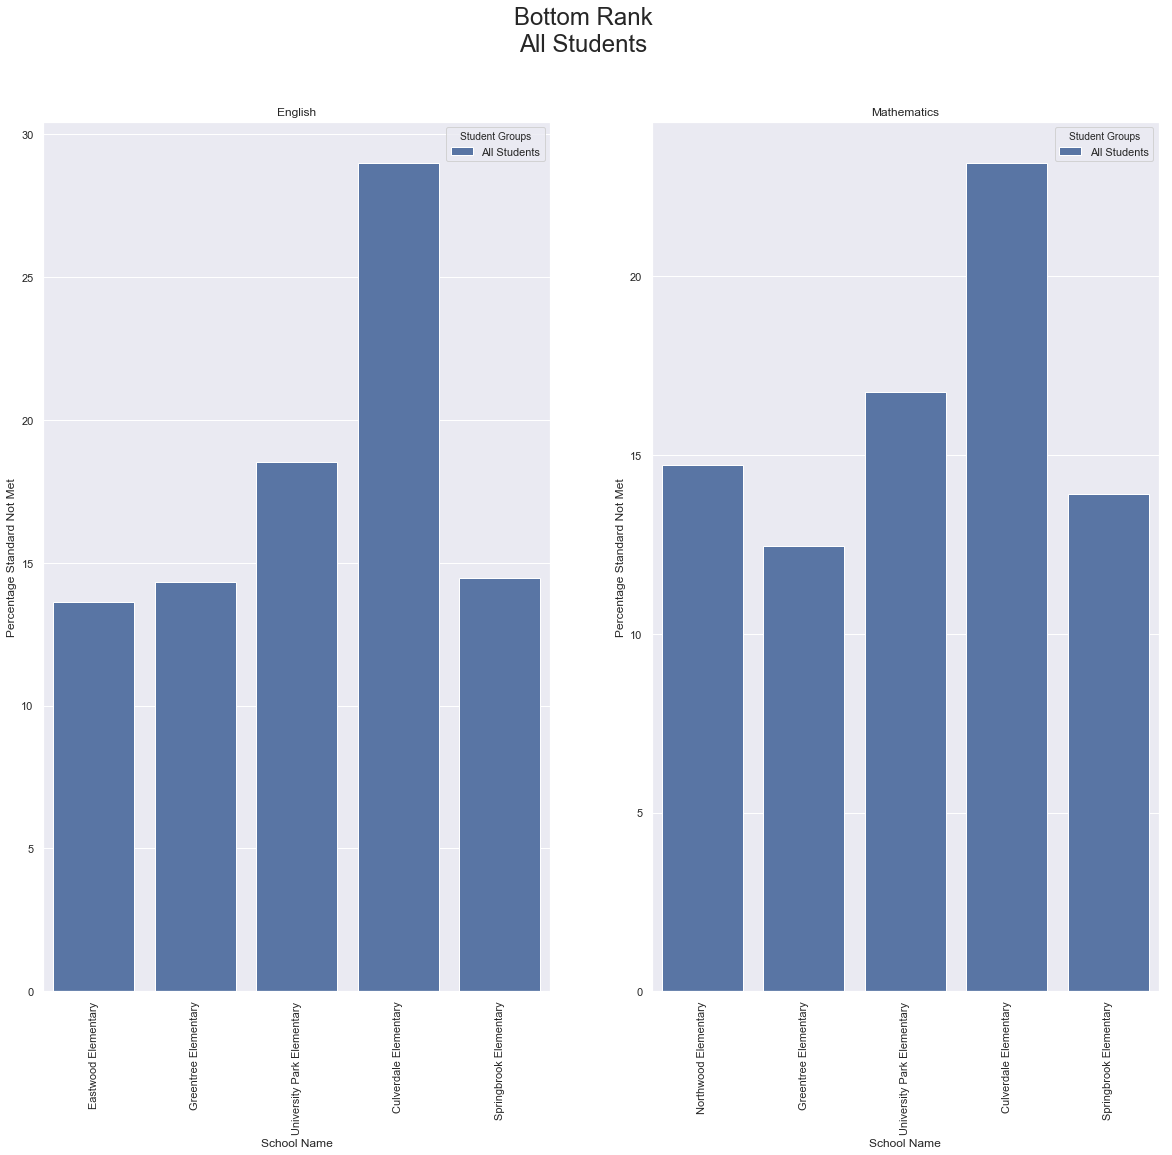

In [109]:
dfTop_Low_schools = getDFTop_Low(irvine_district_elementary, "School Name", 5)
drawBarplotSchool(dfTop_Low_schools, 'All Students', 'English', 'Mathematics', "School Name", "Percentage Standard Exceeded", "Top")
drawBarplotSchool(dfTop_Low_schools, 'All Students', 'English', 'Mathematics', "School Name", "Percentage Standard Not Met", "Bottom")
